## Author: Fang Jung (Kristy) Lin
## Purpose: Regression Analysis on Housing Price Prediction 

## Purpose for the analysis

#### Predict the selling prices of houses in the region:
You are in market to buy 4 bedrooms, 2 baths and 2 storied houses with approx lot size of 5500 SFT in specific area. You would like to gather historical sales data and analyze for bidding the right price for the house.
#### Based on the housing sales history data provide the following:
- Comparative study of house sale in specific region
- Identify house price variation

## Content of the analysis

### - Import necessary packages
### - Part1. Data Acquisition and Exploratory Data Analysis
### - Part2. Linear Regression
### - Part3. Random Forest
### - Part4. Conclusion

## Import necessary packages

In [1]:
library(readr)
library(tidyverse)
library(modelr)
library(ggplot2)
install.packages("GGally")
library(GGally)
library(randomForest)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.2       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ ggplot2 3.3.2       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



## Part1. Data Acquisition and Exploratory Data Analysis

### Walk through Housing data set

In [2]:
housing <- read_csv("Desktop/Housing.csv")
head(housing)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  price = col_double(),
  lotsize = col_double(),
  bedrooms = col_double(),
  bathrms = col_double(),
  stories = col_double(),
  driveway = col_character(),
  recroom = col_character(),
  fullbase = col_character(),
  gashw = col_character(),
  airco = col_character(),
  garagepl = col_double(),
  prefarea = col_character()
)


X1,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500,4000,2,1,1,yes,no,no,no,no,0,no
3,49500,3060,3,1,1,yes,no,no,no,no,0,no
4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000,6360,2,1,1,yes,no,no,no,no,0,no
6,66000,4160,3,1,1,yes,yes,yes,no,yes,0,no


### View the strucuture of data

We can find that the data set contains 546 observations and 13 variables

In [3]:
str(housing)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	546 obs. of  13 variables:
 $ X1      : num  1 2 3 4 5 6 7 8 9 10 ...
 $ price   : num  42000 38500 49500 60500 61000 66000 66000 69000 83800 88500 ...
 $ lotsize : num  5850 4000 3060 6650 6360 4160 3880 4160 4800 5500 ...
 $ bedrooms: num  3 2 3 3 2 3 3 3 3 3 ...
 $ bathrms : num  1 1 1 1 1 1 2 1 1 2 ...
 $ stories : num  2 1 1 2 1 1 2 3 1 4 ...
 $ driveway: chr  "yes" "yes" "yes" "yes" ...
 $ recroom : chr  "no" "no" "no" "yes" ...
 $ fullbase: chr  "yes" "no" "no" "no" ...
 $ gashw   : chr  "no" "no" "no" "no" ...
 $ airco   : chr  "no" "no" "no" "no" ...
 $ garagepl: num  1 0 0 0 0 0 2 0 0 1 ...
 $ prefarea: chr  "no" "no" "no" "no" ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_double(),
  ..   price = col_double(),
  ..   lotsize = col_double(),
  ..   bedrooms = col_double(),
  ..   bathrms = col_double(),
  ..   stories = col_double(),
  ..   driveway = col_character(),
  ..   recroom = col_character(),
  ..   fullba

### Perform light data modifications (Remove columns that are not necessary to the study)¶

Dropped the Column of X1 out of the dataframe

In [4]:
# Drop the columns of the dataframe
housing$X1 <- NULL
head(housing)

price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
42000,5850,3,1,2,yes,no,yes,no,no,1,no
38500,4000,2,1,1,yes,no,no,no,no,0,no
49500,3060,3,1,1,yes,no,no,no,no,0,no
60500,6650,3,1,2,yes,yes,no,no,no,0,no
61000,6360,2,1,1,yes,no,no,no,no,0,no
66000,4160,3,1,1,yes,yes,yes,no,yes,0,no


Columns in the Dataset:
- price
- lotsize
- bedrooms
- bathrms
- stories
- driveway
- recroom
- fullbase
- gashw
- airco
- garagepl
- prefarea

### Check the NULL values

As we can see from the result, there is no missing value.

In [5]:
sum(is.na(housing))

[1] 0

### Explore the dataframe

As we can see from the result, the range of housing price and lotsize is quite huge.

The Mean price of house is 68122, the mean SFT of lotsize is 5150, the mean number of bedrooms is 2.96, the mean number of bathrooms is 1.286, the mean number of stories is 1.808

In [6]:
summary(housing)

     price           lotsize         bedrooms        bathrms     
 Min.   : 25000   Min.   : 1650   Min.   :1.000   Min.   :1.000  
 1st Qu.: 49125   1st Qu.: 3600   1st Qu.:2.000   1st Qu.:1.000  
 Median : 62000   Median : 4600   Median :3.000   Median :1.000  
 Mean   : 68122   Mean   : 5150   Mean   :2.965   Mean   :1.286  
 3rd Qu.: 82000   3rd Qu.: 6360   3rd Qu.:3.000   3rd Qu.:2.000  
 Max.   :190000   Max.   :16200   Max.   :6.000   Max.   :4.000  
    stories        driveway           recroom            fullbase        
 Min.   :1.000   Length:546         Length:546         Length:546        
 1st Qu.:1.000   Class :character   Class :character   Class :character  
 Median :2.000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1.808                                                           
 3rd Qu.:2.000                                                           
 Max.   :4.000                                                           
    gashw           

### Handling categorical variables to numerical variables

- 0 means 'No'
- 1 means 'Yes'

#### driveway

In [7]:
housing$driveway <- ifelse(housing$driveway == 'yes',1,0)
table(housing$driveway)


  0   1 
 77 469 

#### recroom

In [8]:
housing$recroom <- ifelse(housing$recroom == 'yes',1,0)
table(housing$recroom)


  0   1 
449  97 

#### fullbase

In [9]:
housing$fullbase <- ifelse(housing$fullbase == 'yes',1,0)
table(housing$fullbase)


  0   1 
355 191 

#### gashw

In [10]:
housing$gashw <- ifelse(housing$gashw == 'yes',1,0)
table(housing$gashw)


  0   1 
521  25 

#### airco

In [11]:
housing$airco <- ifelse(housing$airco == 'yes',1,0)
table(housing$airco)


  0   1 
373 173 

#### prefarea

In [12]:
housing$prefarea <- ifelse(housing$prefarea == 'yes',1,0)
table(housing$prefarea)


  0   1 
418 128 

### Visualization the price distribution

As we can see from the graph, the housing price distribution is right-skewed

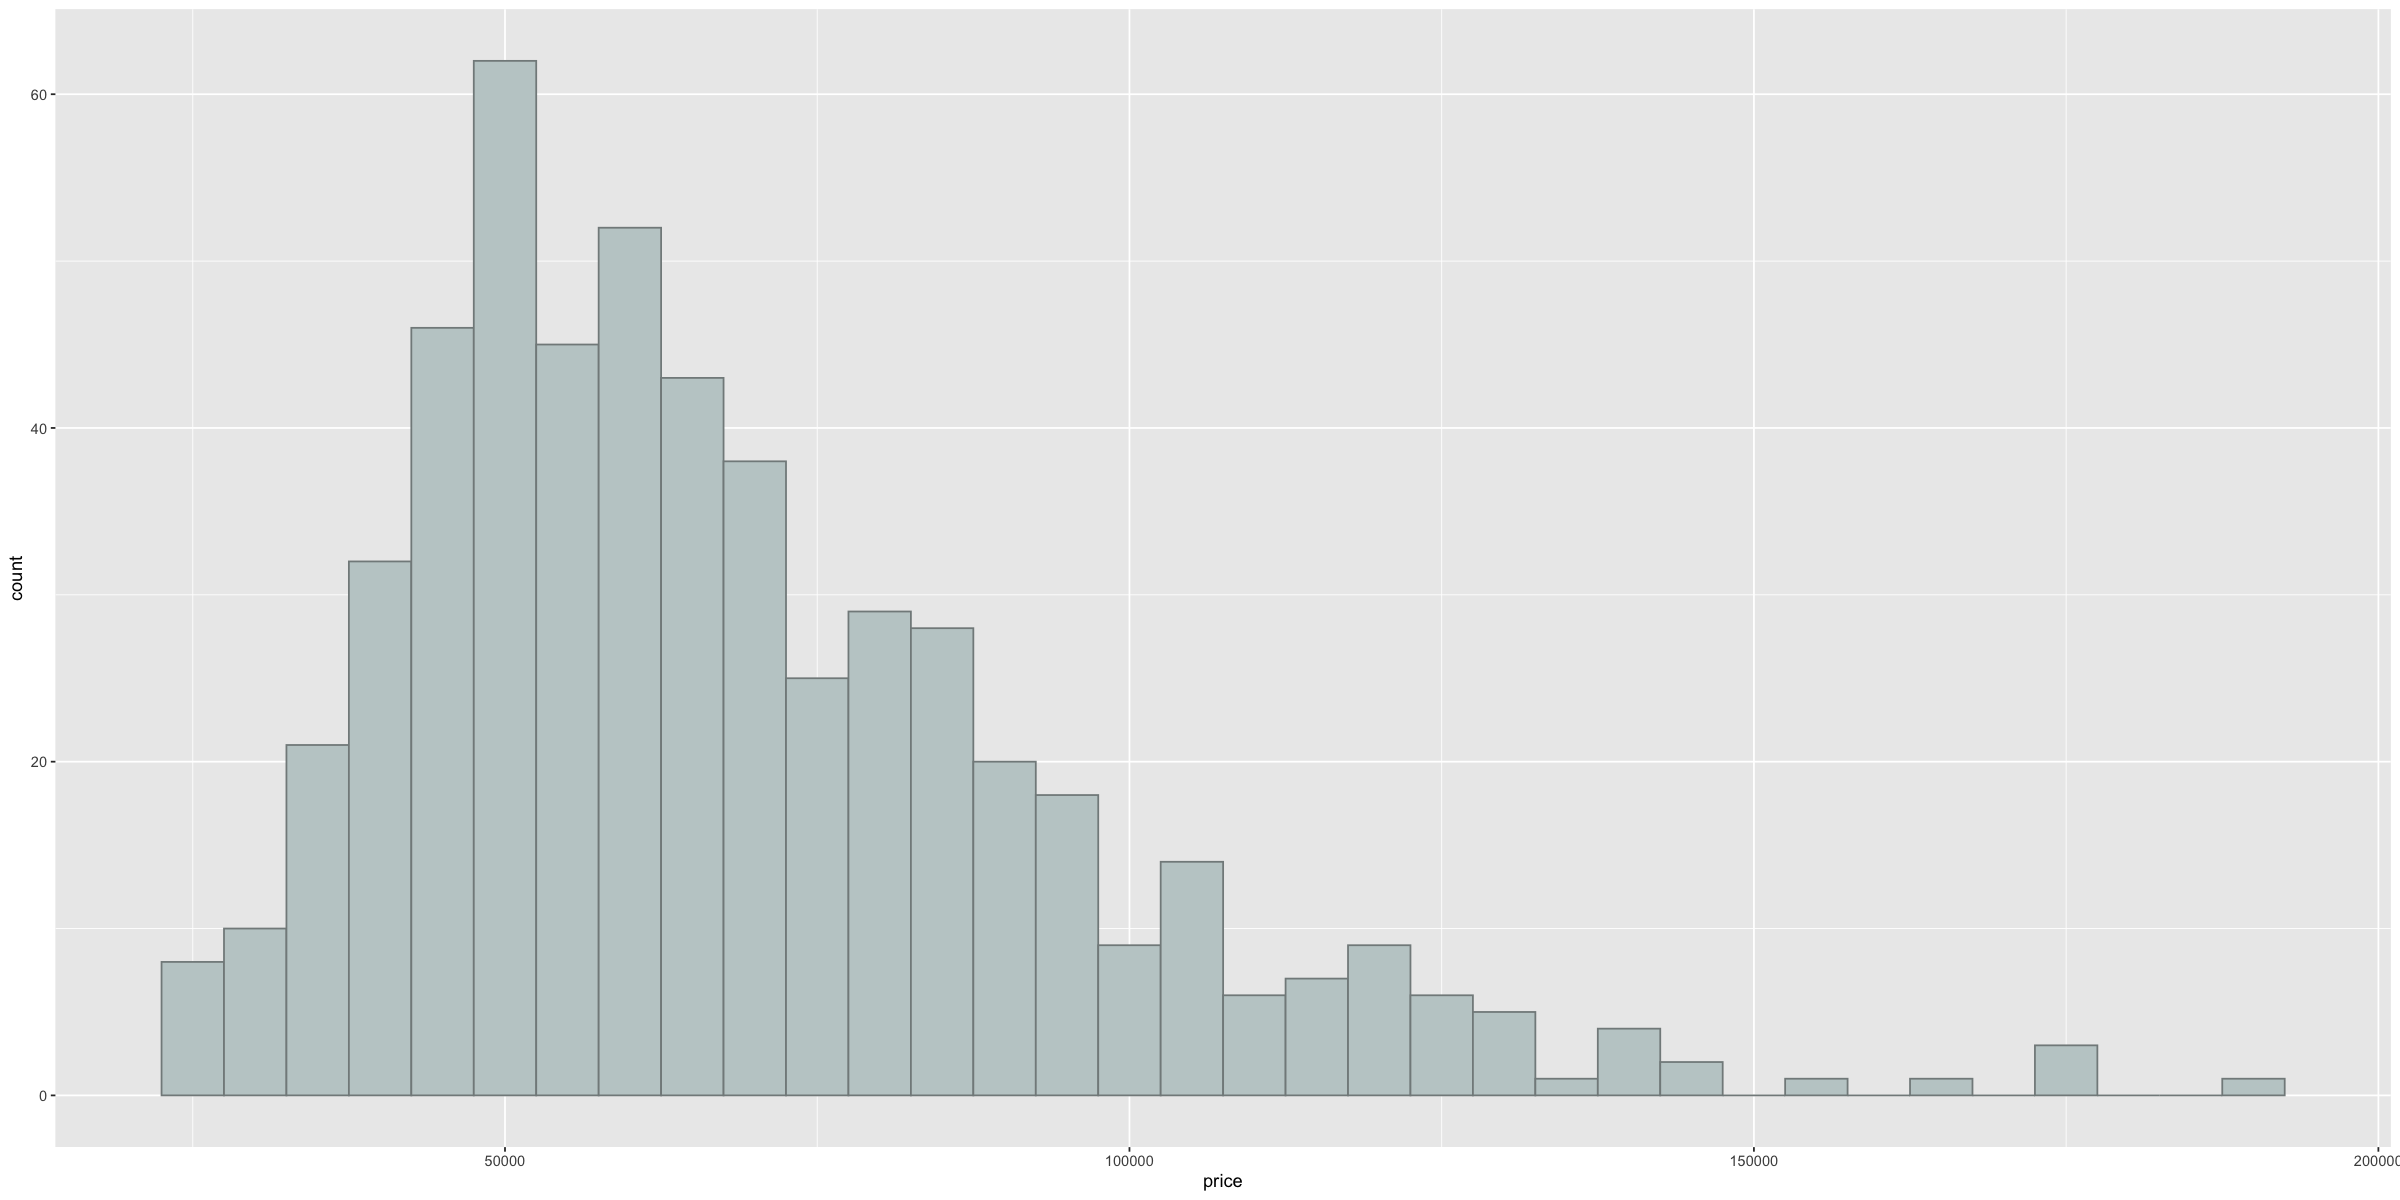

In [13]:
options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(data = housing, aes(x = price)) +
  geom_histogram(fill = 'azure3', col = 'azure4', binwidth = 5000)

### Visualize the lotsize distribution

As we can see from the graph, the lotsize distribution is also right-skewed.

We can assume that the pricing of the house has a positive relation with the lotsize.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


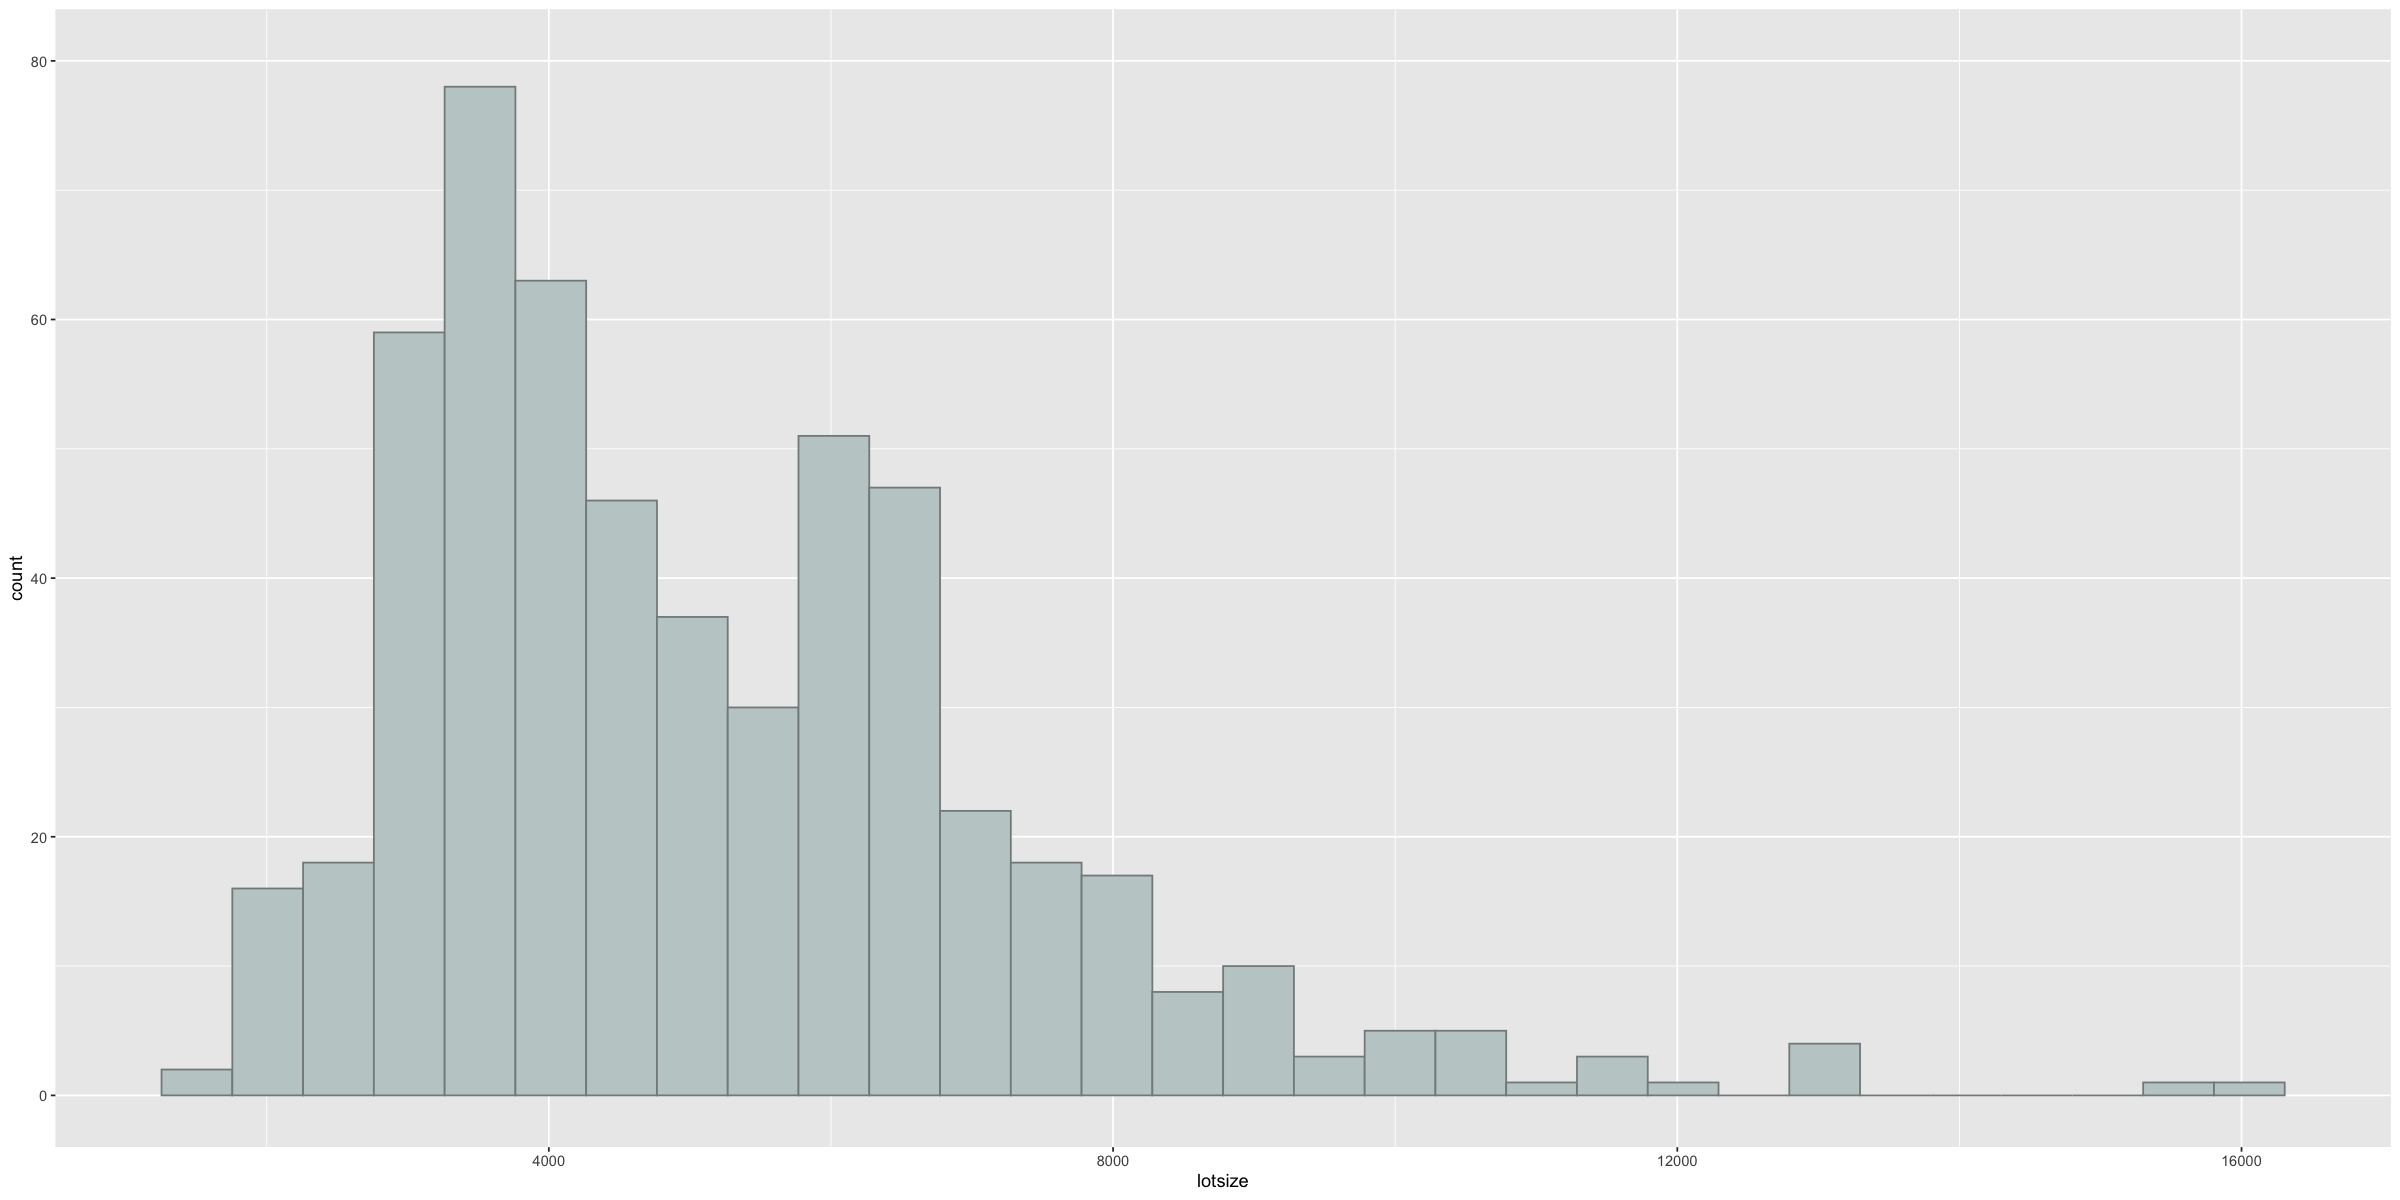

In [14]:
options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(housing,aes(x=lotsize))+
  geom_histogram(fill = 'azure3', col = 'azure4')+
  coord_cartesian(ylim = c(0,80))+
  scale_x_continuous(breaks = seq(0,18000,4000))

### Visualize the relation between price and bedrooms

As we can see from the boxplot, we can find that the median housing price and the price range increase when the number of bedrooms increase. However, when the number of bedrooms achieve the max(6), the housing price decrease.

We can say that there is a positive relation between the number of bedrooms and price.

$bedrooms


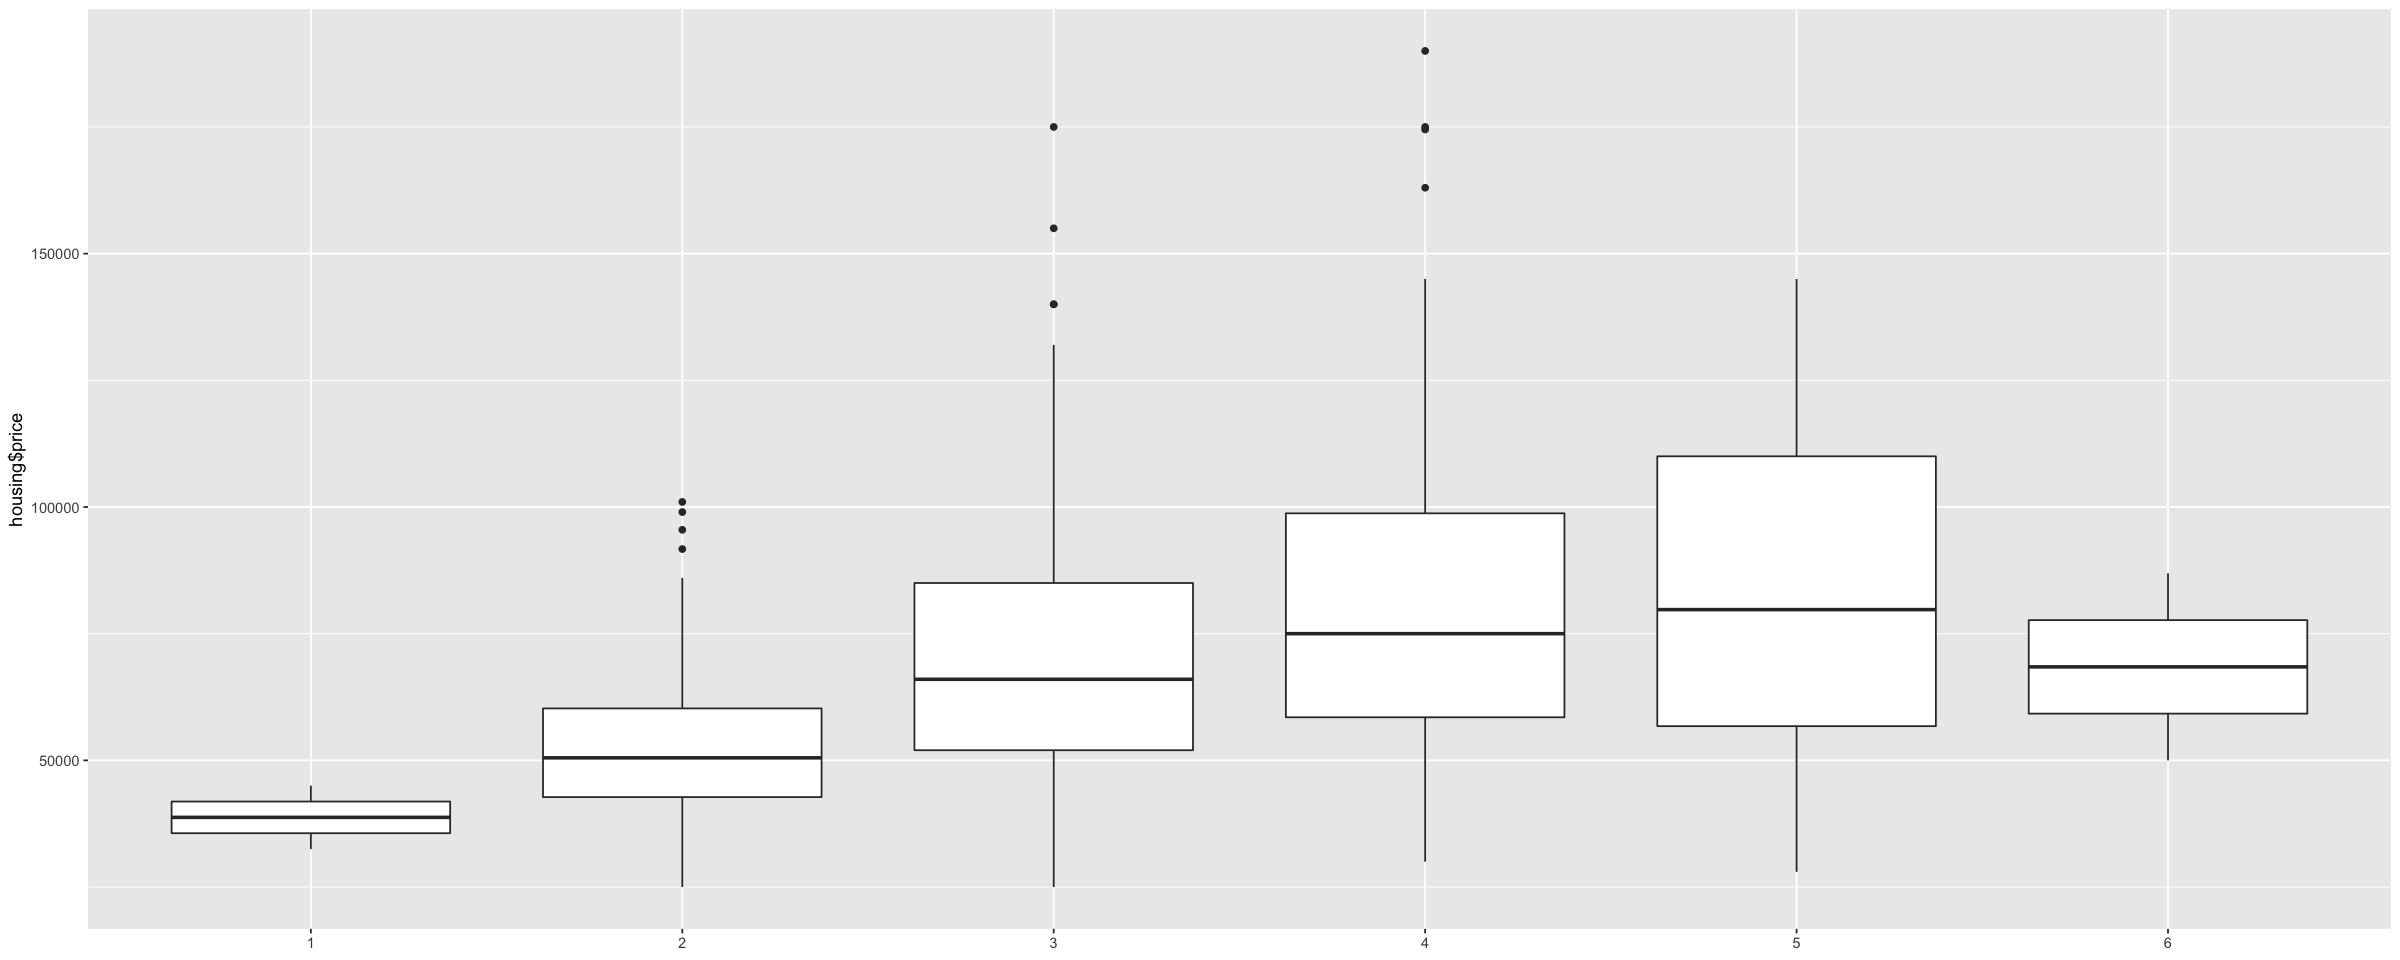

In [15]:
options(repr.plot.width = 20, repr.plot.height = 8)
housing%>%
  select(bedrooms)%>%
  map(~ggplot(data=data.frame(.),aes(x=as.factor(.),y=housing$price))+
                   geom_boxplot()+
                     labs(x=names(.)))

### Visualize the relation between price and bathrms

As we can see from the boxplot, the median housing price and the price range increase when the number of bathrooms increase. 
We can say that there is a positive relation between the number of bathrooms and price.

$bathrms


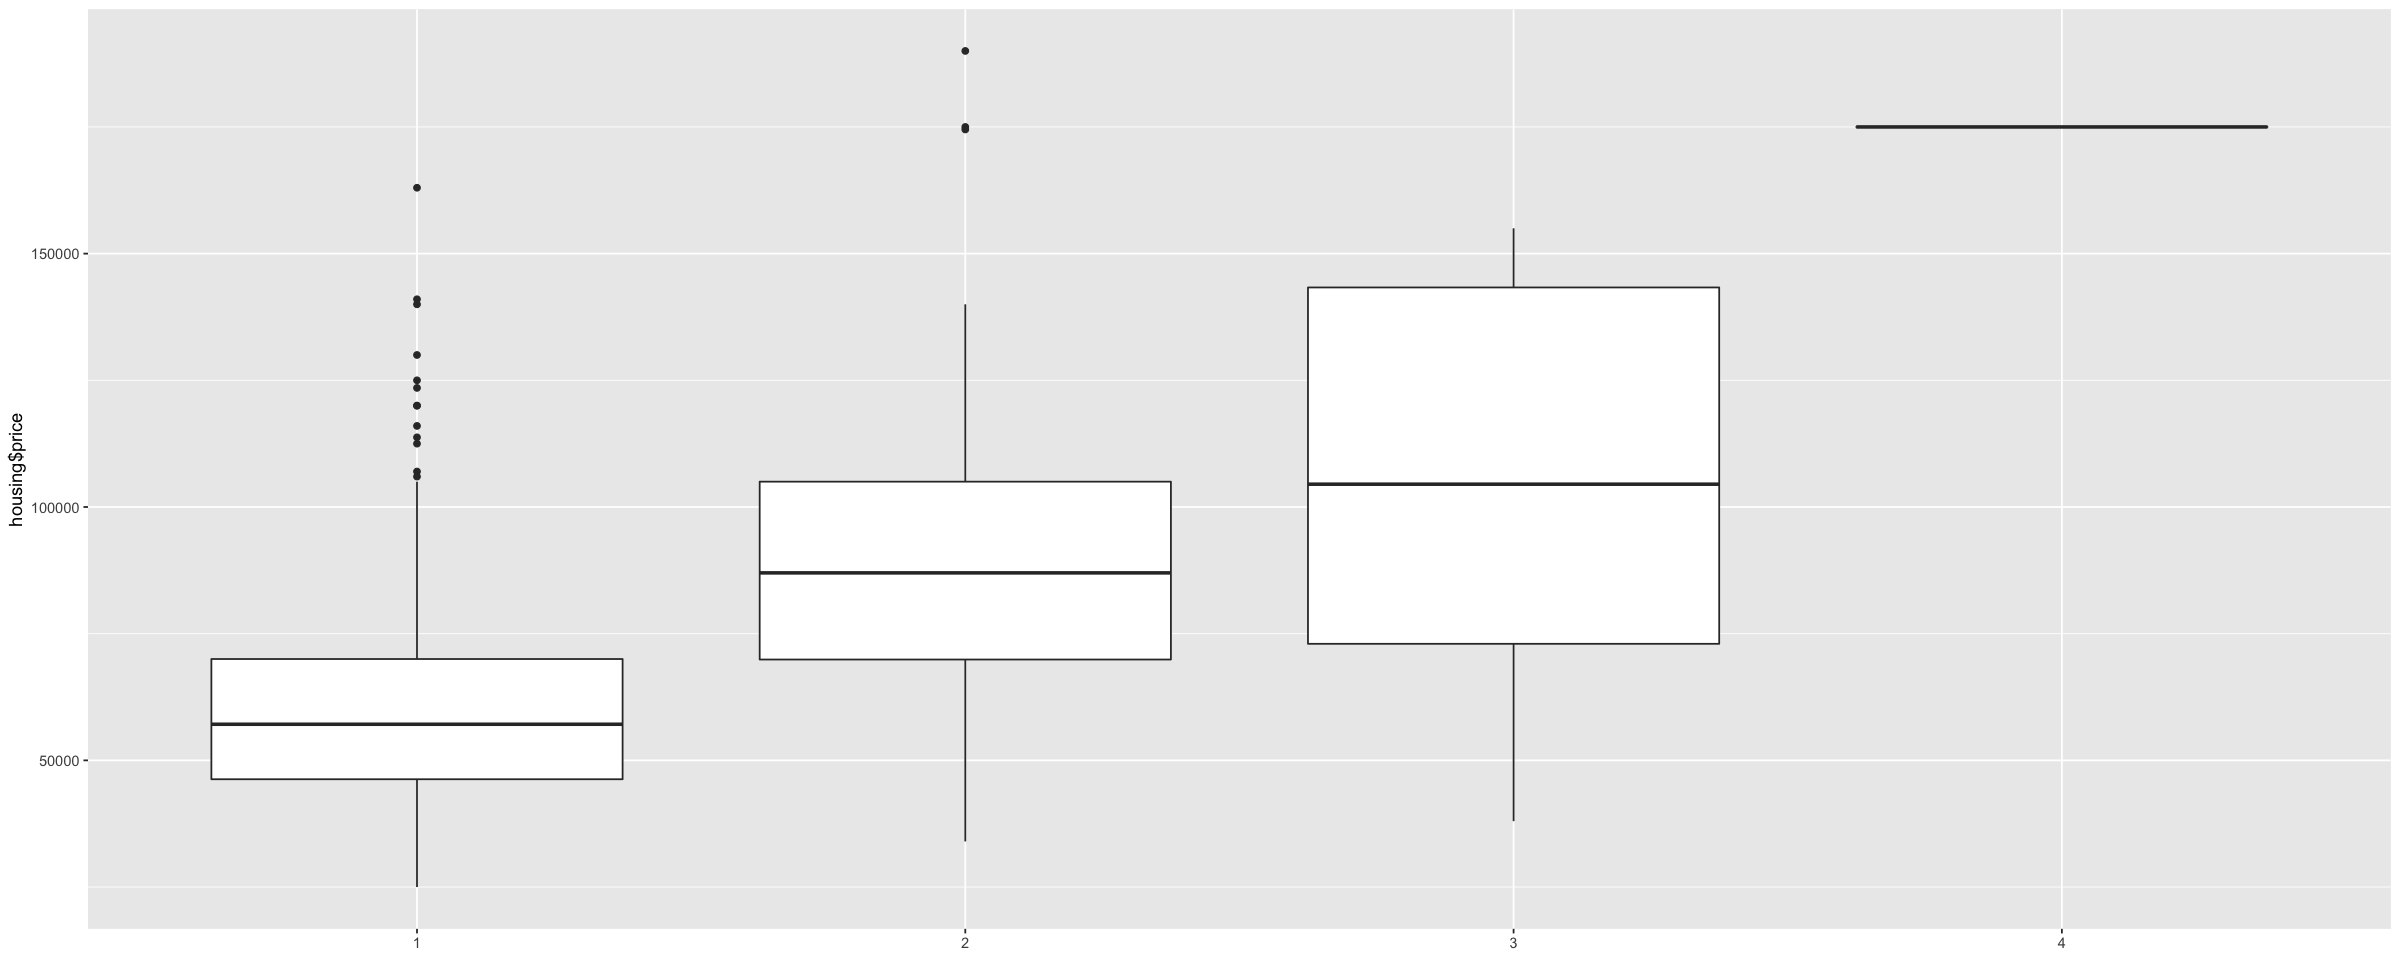

In [16]:
options(repr.plot.width = 20, repr.plot.height = 8)
housing%>%
  select(bathrms)%>%
  map(~ggplot(data=data.frame(.),aes(x=as.factor(.),y=housing$price))+
                   geom_boxplot()+
                     labs(x=names(.)))

### Visualize the relation between price and stories

As we can see from the boxplot, the median housing price increase when the number of stories increase.

We can say that there is a positive relation between housing price and the number of stories.

$stories


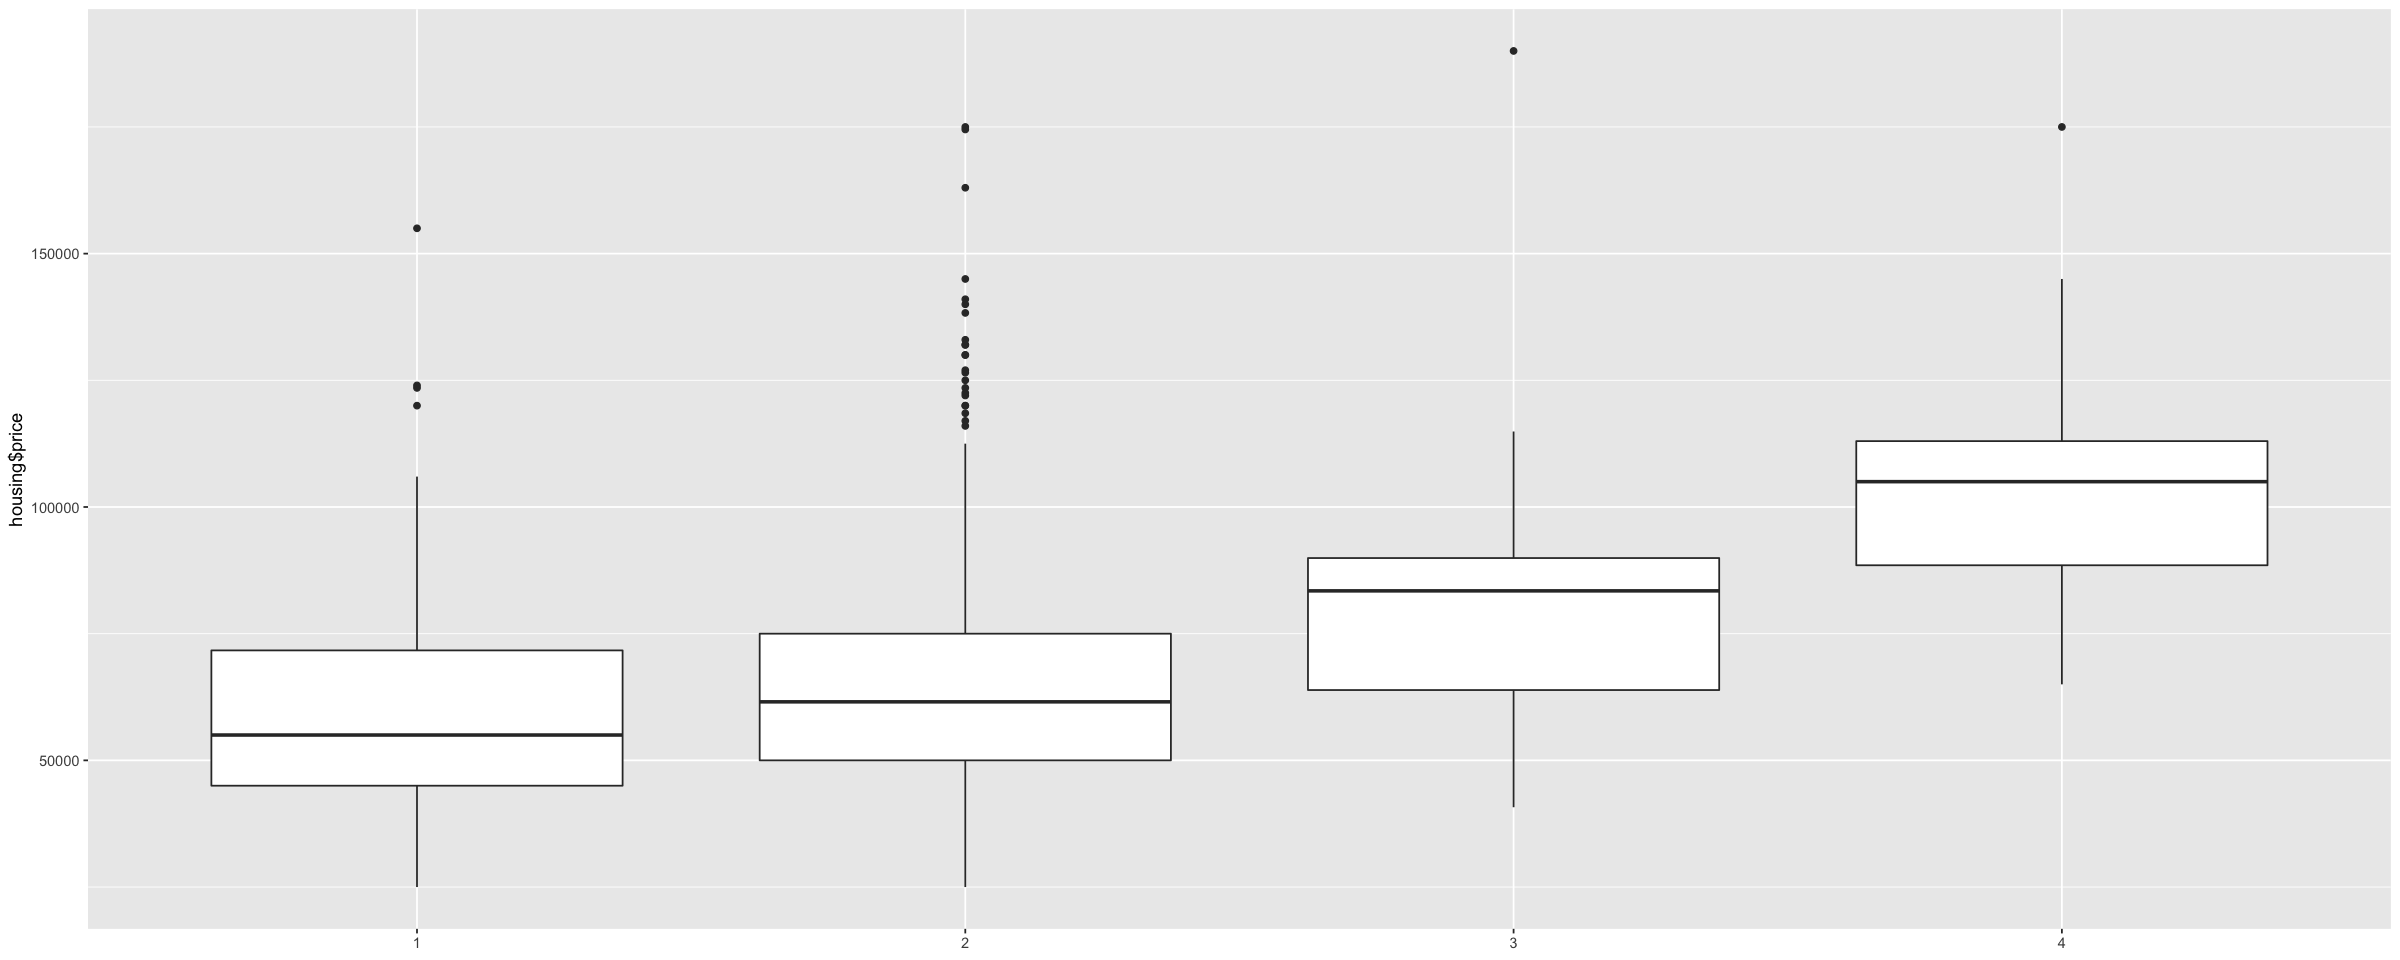

In [17]:
options(repr.plot.width = 20, repr.plot.height = 8)
housing%>%
  select(stories)%>%
  map(~ggplot(data=data.frame(.),aes(x=as.factor(.),y=housing$price))+
                   geom_boxplot()+
                     labs(x=names(.)))

### Correlation among all variables

As we can see from the heatmap, housing price has a comparatively relation with lotsize, bedrooms, bathrms, stories, airco, and garageol.

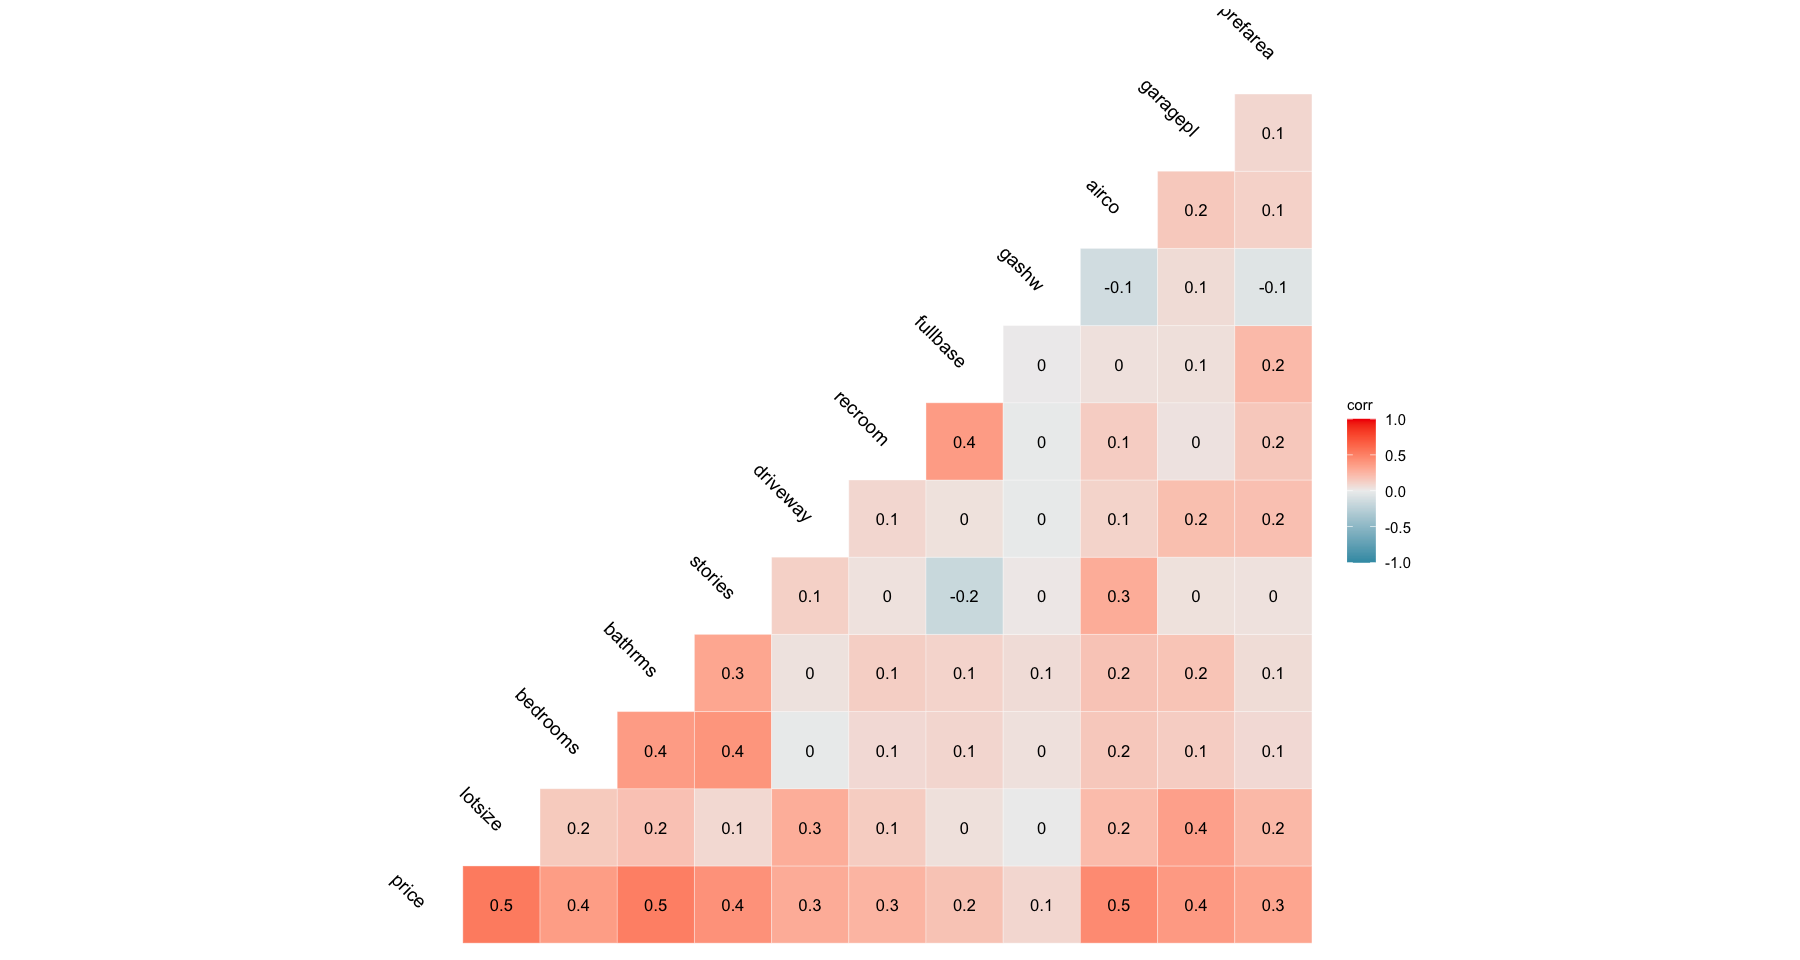

In [18]:
options(repr.plot.width = 15, repr.plot.height = 8)
ggcorr(housing,name = "corr", label = TRUE, hjust = 1, label_size = 3.5, 
       angle = -45, size = 4)

### Information from Exploratory Data Analysis

- There are 546 observations and 13 variables in the data set.
- There is no missing value in the data set.
- The Mean price of house is 68122, the mean SFT of lotsize is 5150, the mean number of bedrooms is 2.96, the mean number of bathrooms is 1.286, the mean number of stories is 1.808.
- The range of housing price and lotsize is quite huge.
- The distrubution of housing price is right-skewed, most of the housing price are located in the range of 40000 to 70000.
- The distribution of lotsize is right-skewed, most of them are located in 3000~7000 SFT.
- From the distribution of housing price and lotsize, I assume that there is a positive relation between price and lotsize.
- From the boxplot, I get the information that there is a postive relation between price and the number of bedrooms.
- From the boxplot, I get the information that there is a postive relation between price and the number of bathrooms.
- From the boxplot, I get the information that there is a postive relation between price and the number of stories.
- From the heatmap, I find that housing price has a comparatively relation with lotsize, bedrooms, bathrms, stories, airco, and garageol.

Next, I will build a linear regression to see the performance of the model and predict the housing price from the requirement. 

## Part2. Linear Regression

In this step, I set up the linear regression model, and predict the housing price.

### Build the linear regression model

From the requirement of the analysis, I set up independent/dependent variables as below.

Independent Variables:

- bedrooms
- bathrooms
- stories
- lotsize
- driveway
- recroom
- fullbase
- gashw
- airco
- garagepl
- prefarea

Dependent Variables:

- price

### Set train/test data

In [19]:
set.seed(100)
train <- sample(nrow(housing), 0.7*nrow(housing), replace = FALSE)
TrainSet <- housing[train,]
ValidSet <- housing[-train,]
summary(TrainSet)
summary(ValidSet)

     price           lotsize         bedrooms        bathrms     
 Min.   : 25000   Min.   : 1700   Min.   :1.000   Min.   :1.000  
 1st Qu.: 50000   1st Qu.: 3600   1st Qu.:3.000   1st Qu.:1.000  
 Median : 65000   Median : 4643   Median :3.000   Median :1.000  
 Mean   : 70164   Mean   : 5243   Mean   :2.969   Mean   :1.309  
 3rd Qu.: 84675   3rd Qu.: 6415   3rd Qu.:3.000   3rd Qu.:2.000  
 Max.   :175000   Max.   :16200   Max.   :5.000   Max.   :4.000  
    stories         driveway         recroom          fullbase     
 Min.   :1.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :2.000   Median :1.0000   Median :0.0000   Median :0.0000  
 Mean   :1.798   Mean   :0.8717   Mean   :0.1832   Mean   :0.3665  
 3rd Qu.:2.000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :4.000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
     gashw             airco           garagepl        prefare

     price           lotsize         bedrooms        bathrms     
 Min.   : 25245   Min.   : 1650   Min.   :2.000   Min.   :1.000  
 1st Qu.: 48375   1st Qu.: 3558   1st Qu.:2.000   1st Qu.:1.000  
 Median : 57500   Median : 4500   Median :3.000   Median :1.000  
 Mean   : 63363   Mean   : 4935   Mean   :2.957   Mean   :1.232  
 3rd Qu.: 77175   3rd Qu.: 6360   3rd Qu.:3.000   3rd Qu.:1.000  
 Max.   :190000   Max.   :11410   Max.   :6.000   Max.   :3.000  
    stories         driveway         recroom          fullbase    
 Min.   :1.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:1.000   1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :2.000   Median :1.0000   Median :0.0000   Median :0.000  
 Mean   :1.829   Mean   :0.8293   Mean   :0.1646   Mean   :0.311  
 3rd Qu.:2.000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.000  
 Max.   :4.000   Max.   :1.0000   Max.   :1.0000   Max.   :1.000  
     gashw             airco          garagepl         prefarea     


### Build the model

In [20]:
fit_model <- lm(price ~ ., data = TrainSet)
summary(fit_model)


Call:
lm(formula = price ~ ., data = TrainSet)

Residuals:
   Min     1Q Median     3Q    Max 
-38956  -9617   -679   7863  66845 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4843.9224  4238.5203  -1.143 0.253847    
lotsize         3.4969     0.4155   8.417 8.57e-16 ***
bedrooms     2175.0060  1344.4462   1.618 0.106564    
bathrms     15079.0866  1779.6674   8.473 5.73e-16 ***
stories      6530.1982  1141.7905   5.719 2.21e-08 ***
driveway     6600.7196  2649.0026   2.492 0.013148 *  
recroom      4284.0187  2327.8835   1.840 0.066524 .  
fullbase     4944.7392  1931.6860   2.560 0.010870 *  
gashw       13693.7409  3910.0735   3.502 0.000518 ***
airco       12409.4953  1936.5294   6.408 4.49e-10 ***
garagepl     4986.6414  1052.5916   4.737 3.09e-06 ***
prefarea     8535.2462  2009.4217   4.248 2.74e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15930 on 370 degrees of freedom
Multiple R-sq

### Predict the value

I set up bedrooms = 4, bathrooms = 2, storied houses = 2 with approx lot size of 5500 SFT. I also assumed that there are driveway, recroom, fullbase, gashw, airco, garagepl, prefarea in the house.

In [21]:
predict(fit_model, data.frame(bedrooms = 4, bathrms = 2, stories = 2, lotsize = 5500, 
                             driveway = 1, recroom = 1, fullbase = 1, gashw = 1, airco = 1, garagepl = 1, 
                             prefarea = 1))

1 
121762

I set up bedrooms = 4, bathrooms = 2, storied houses = 2 with approx lot size of 5500 SFT. I also assumed that there is no driveway, recroom, fullbase, gashw, airco, garagepl, prefarea in the house.

In [22]:
predict(fit_model, data.frame(bedrooms = 4, bathrms = 2, stories = 2, lotsize = 5500, 
                             driveway = 0, recroom = 0, fullbase = 0, gashw = 0, airco = 0, garagepl = 0, 
                             prefarea = 0))

1 
66307.39

### Performance of the model and the outcome

- After running the model, the Multiple R-squared is 0.6731, Adjusted R-squared is 0.6664. 
- When bedrooms = 4, bathrooms = 2, storied houses = 2 with approx lot size of 5500 SFT. And there are driveway, recroom, fullbase, gashw, airco, garagepl, prefarea in the house, I got the result of housing price to be 121761.987274765.
- When bedrooms = 4, bathrooms = 2, storied houses = 2 with approx lot size of 5500 SFT. And there is no driveway, recroom, fullbase, gashw, airco, garagepl, prefarea in the house, I got the result of housing price to be 66307.3859497059.
- From the outcome above, we can find that when the house are equipped with more facilities, the price will be much higher.
- We can also find that when the house only has bedrooms = 4, bathrooms = 2, storied houses = 2 with approx lot size of 5500 SFT, the selling price still above the median of the overall selling price. It's reasonable, because the lotsize and the number of bedrooms, bathrooms, stories are also above the mean value. The higher the value, the higher the price.
- It's clear that the selling price has a positive relation with the number of facilitites.

### Summary of the residuals

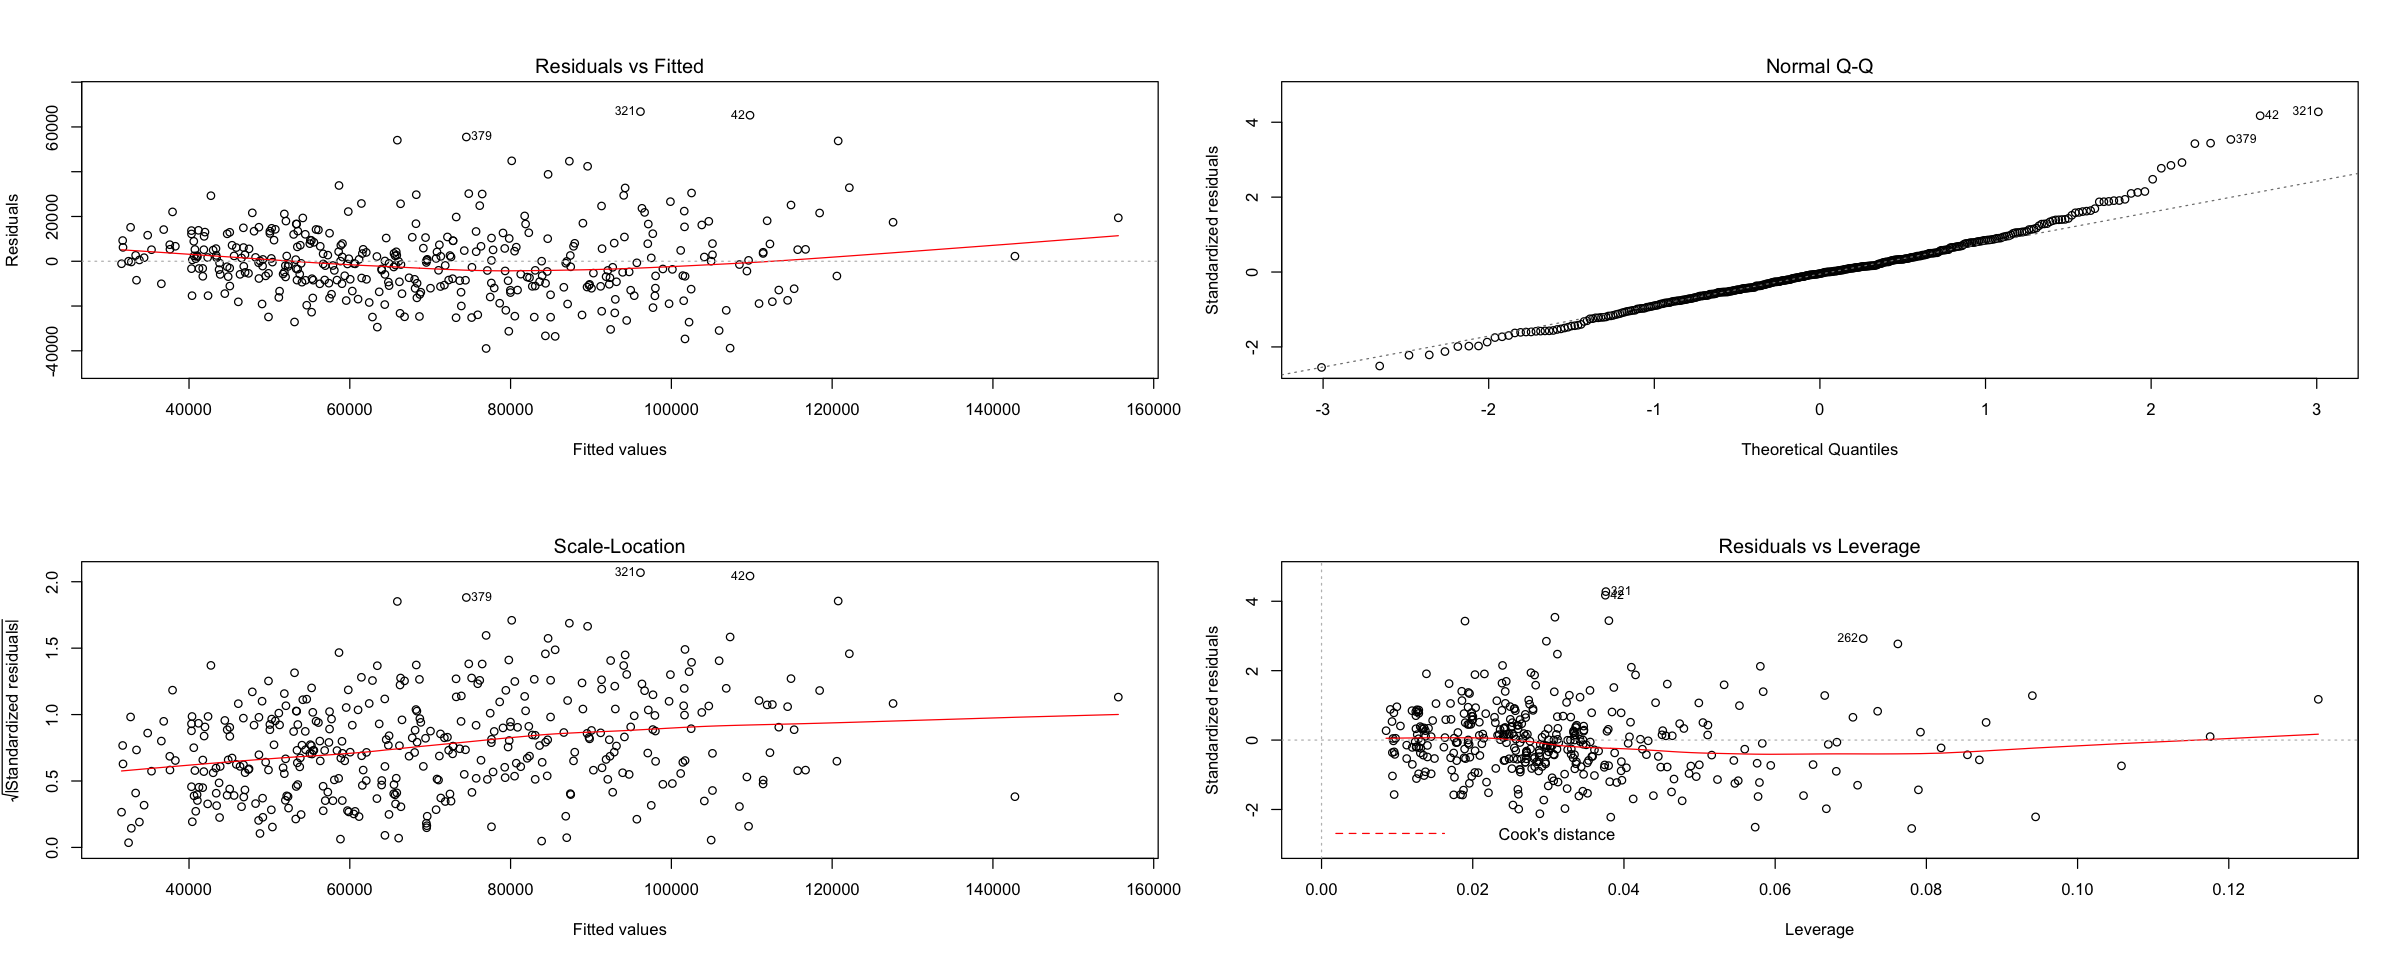

In [23]:
options(repr.plot.width = 20, repr.plot.height = 8)
par(mfrow = c(2, 2))
plot(fit_model)

### Information behind the residual plot

As we can see from the residual plot, we can find that the distribution of the residuals plot are discrete and close to the line. It means that the model performs good and there is no significant deviation.

### Using ggplot to fit a linear model to our scatter plot

#### price and bedrooms

`geom_smooth()` using formula 'y ~ x'


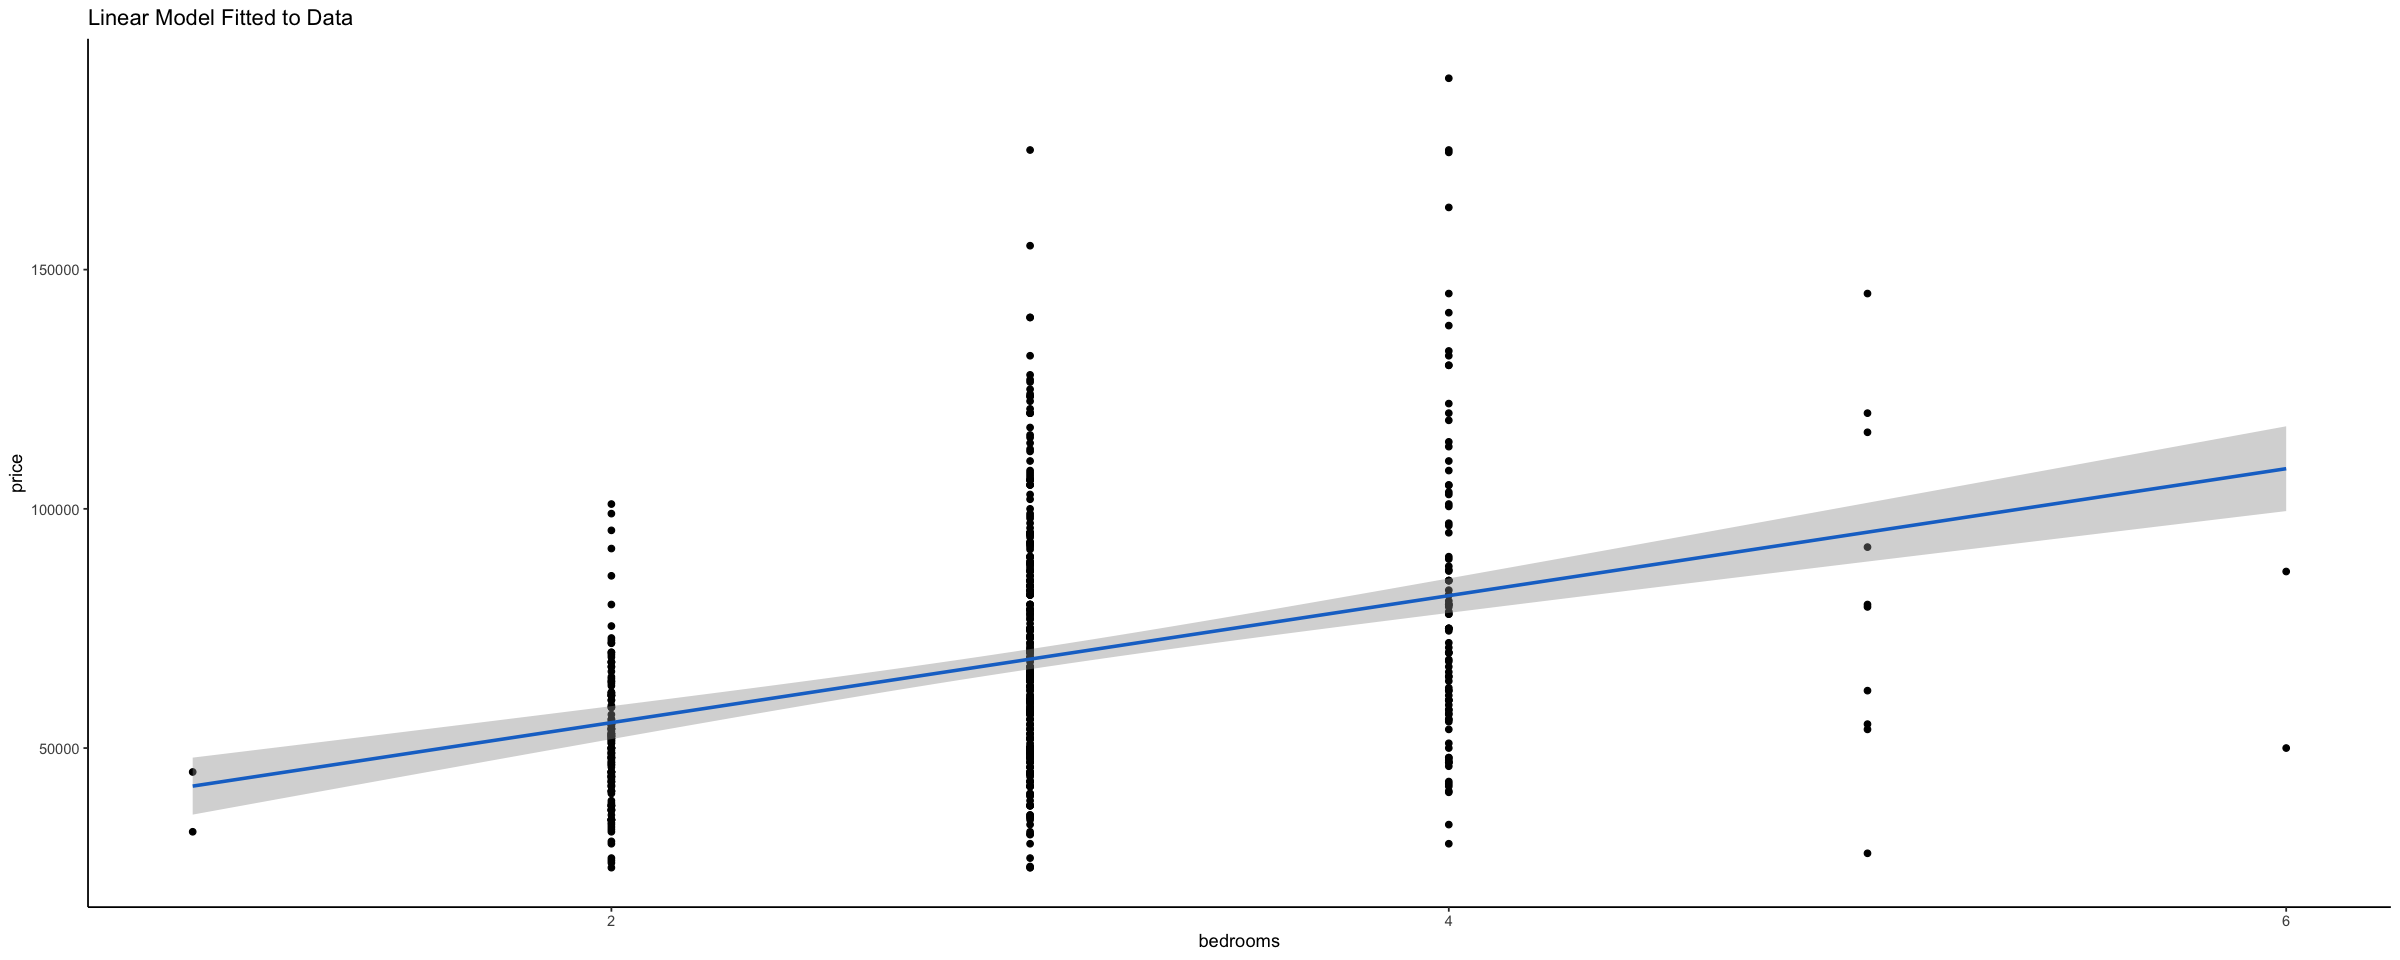

In [24]:
options(repr.plot.width = 20, repr.plot.height = 8)
ggplot(data = housing, aes(x = bedrooms, y = price)) +
  geom_point() +
  stat_smooth(method = "lm", col = "dodgerblue3") +
  theme(panel.background = element_rect(fill = "white"),
        axis.line.x=element_line(),
        axis.line.y=element_line()) +
  ggtitle("Linear Model Fitted to Data")

#### price and bathrooms

`geom_smooth()` using formula 'y ~ x'


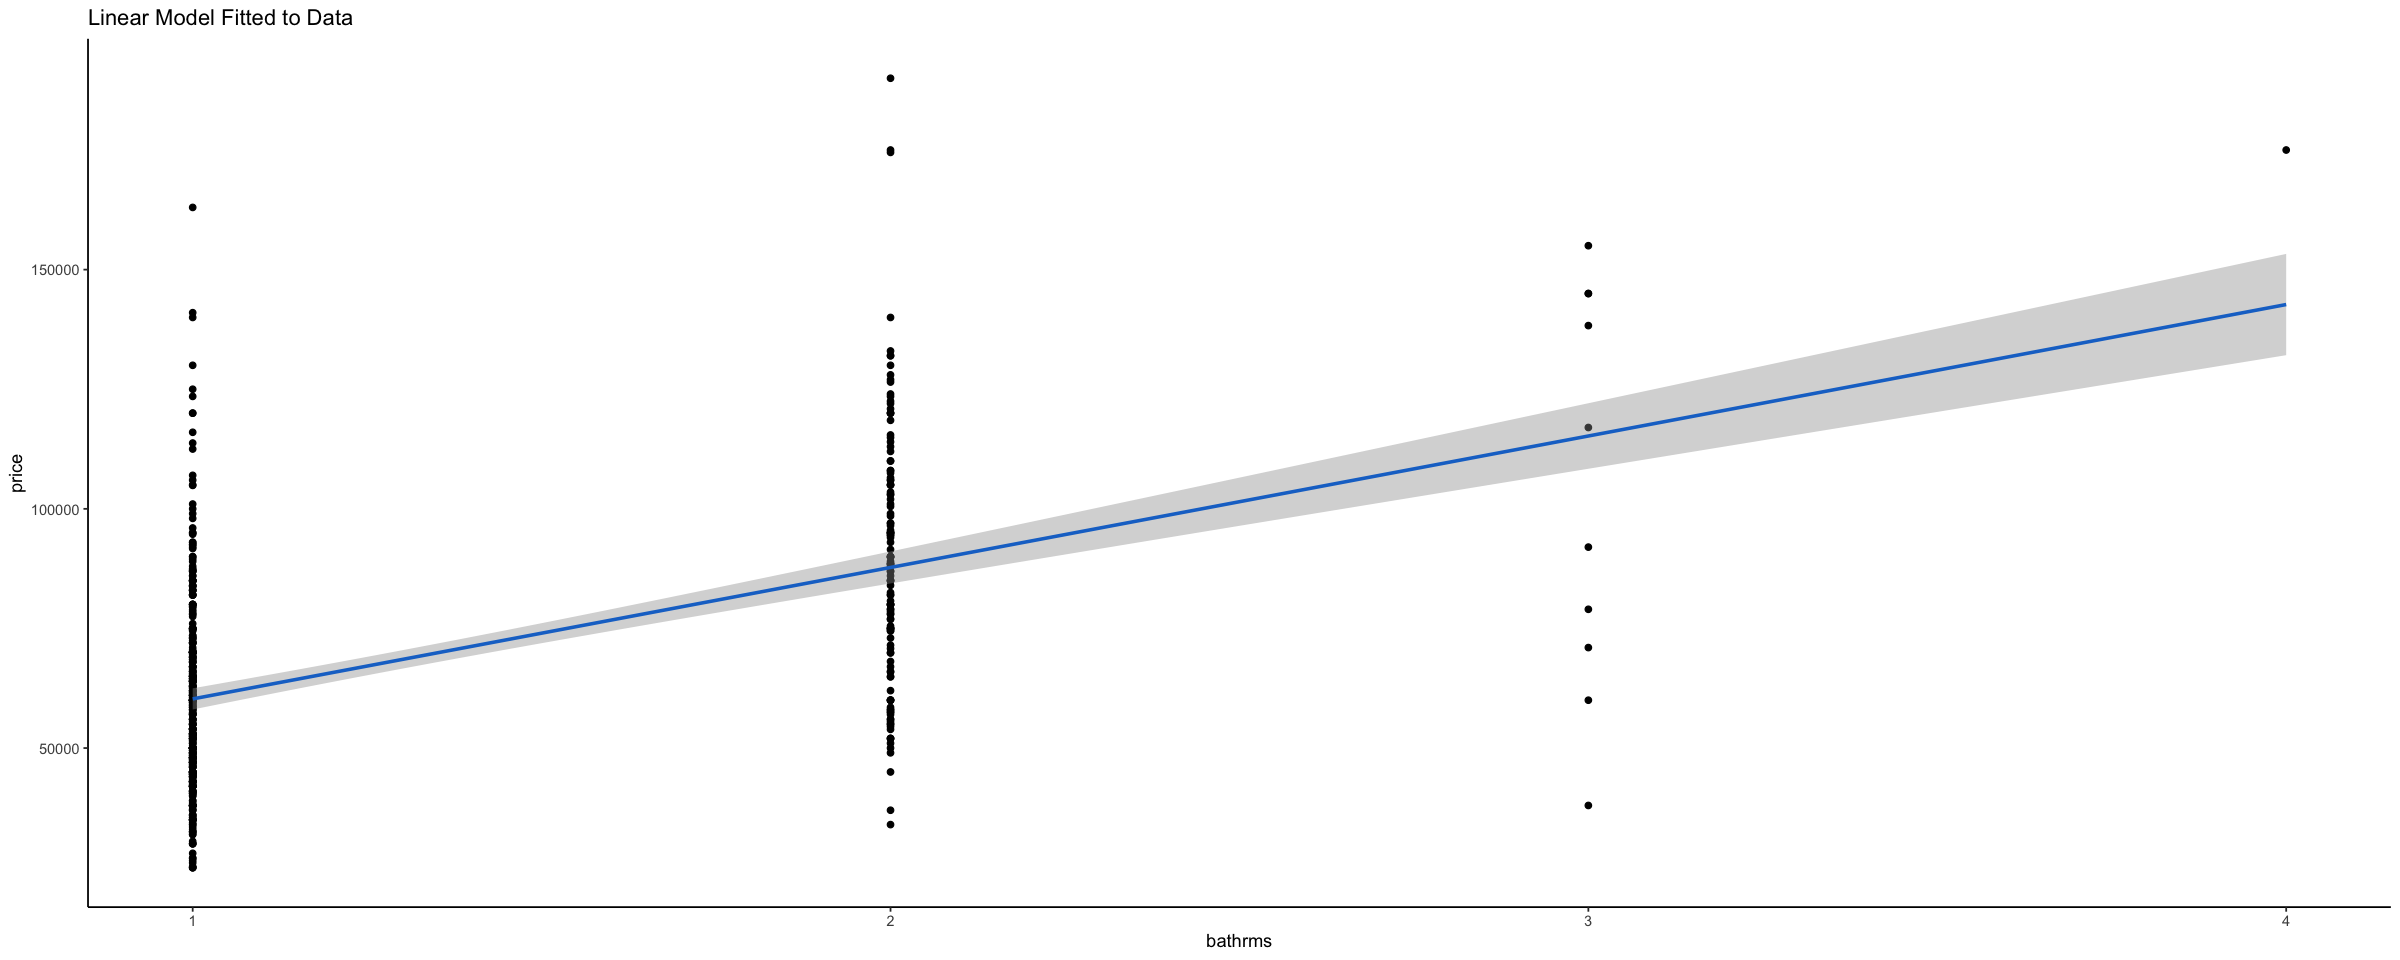

In [25]:
options(repr.plot.width = 20, repr.plot.height = 8)
ggplot(data = housing, aes(x = bathrms, y = price)) +
  geom_point() +
  stat_smooth(method = "lm", col = "dodgerblue3") +
  theme(panel.background = element_rect(fill = "white"),
        axis.line.x=element_line(),
        axis.line.y=element_line()) +
  ggtitle("Linear Model Fitted to Data")

#### price and stories

`geom_smooth()` using formula 'y ~ x'


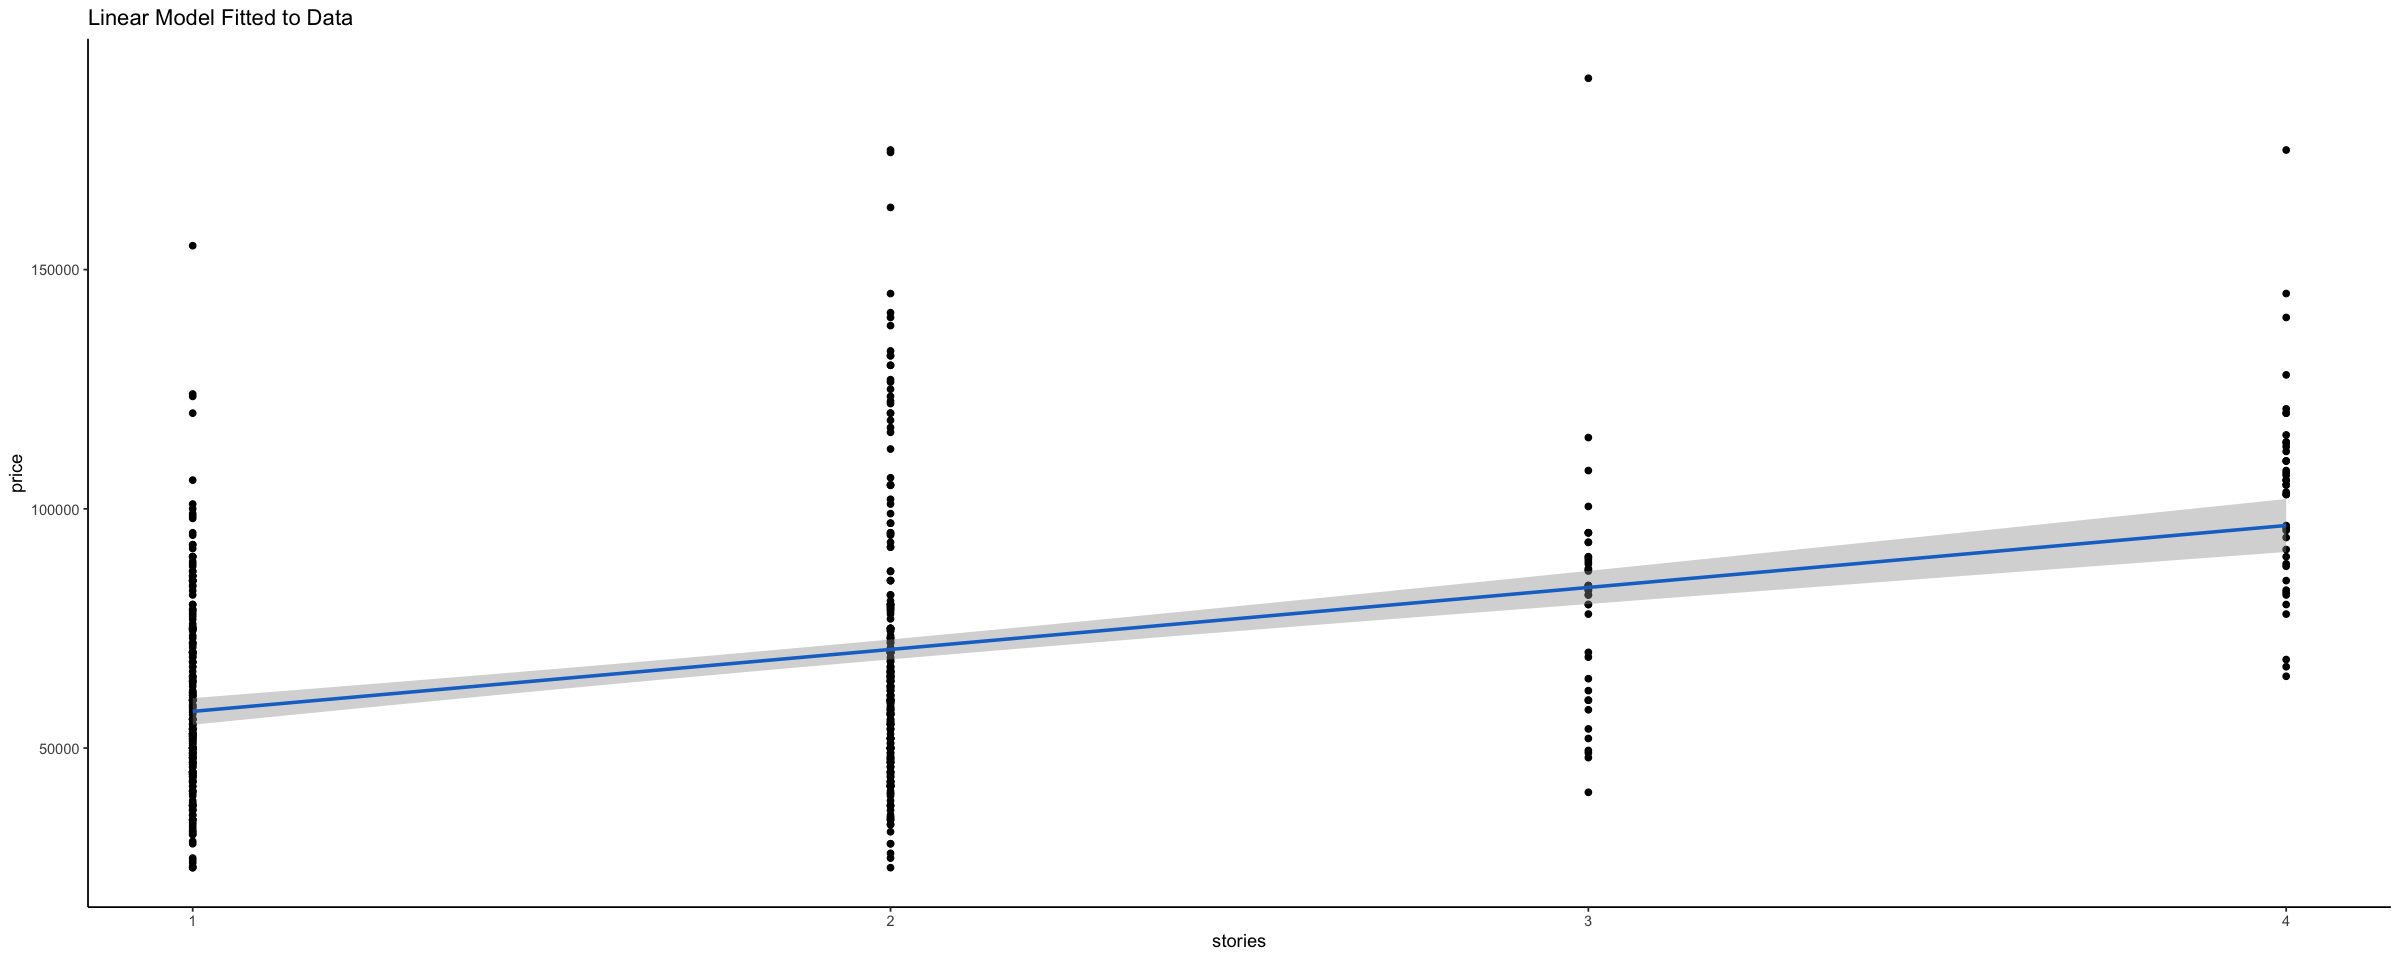

In [26]:
options(repr.plot.width = 20, repr.plot.height = 8)
ggplot(data = housing, aes(x = stories, y = price)) +
  geom_point() +
  stat_smooth(method = "lm", col = "dodgerblue3") +
  theme(panel.background = element_rect(fill = "white"),
        axis.line.x=element_line(),
        axis.line.y=element_line()) +
  ggtitle("Linear Model Fitted to Data")

#### price and lotsize

`geom_smooth()` using formula 'y ~ x'


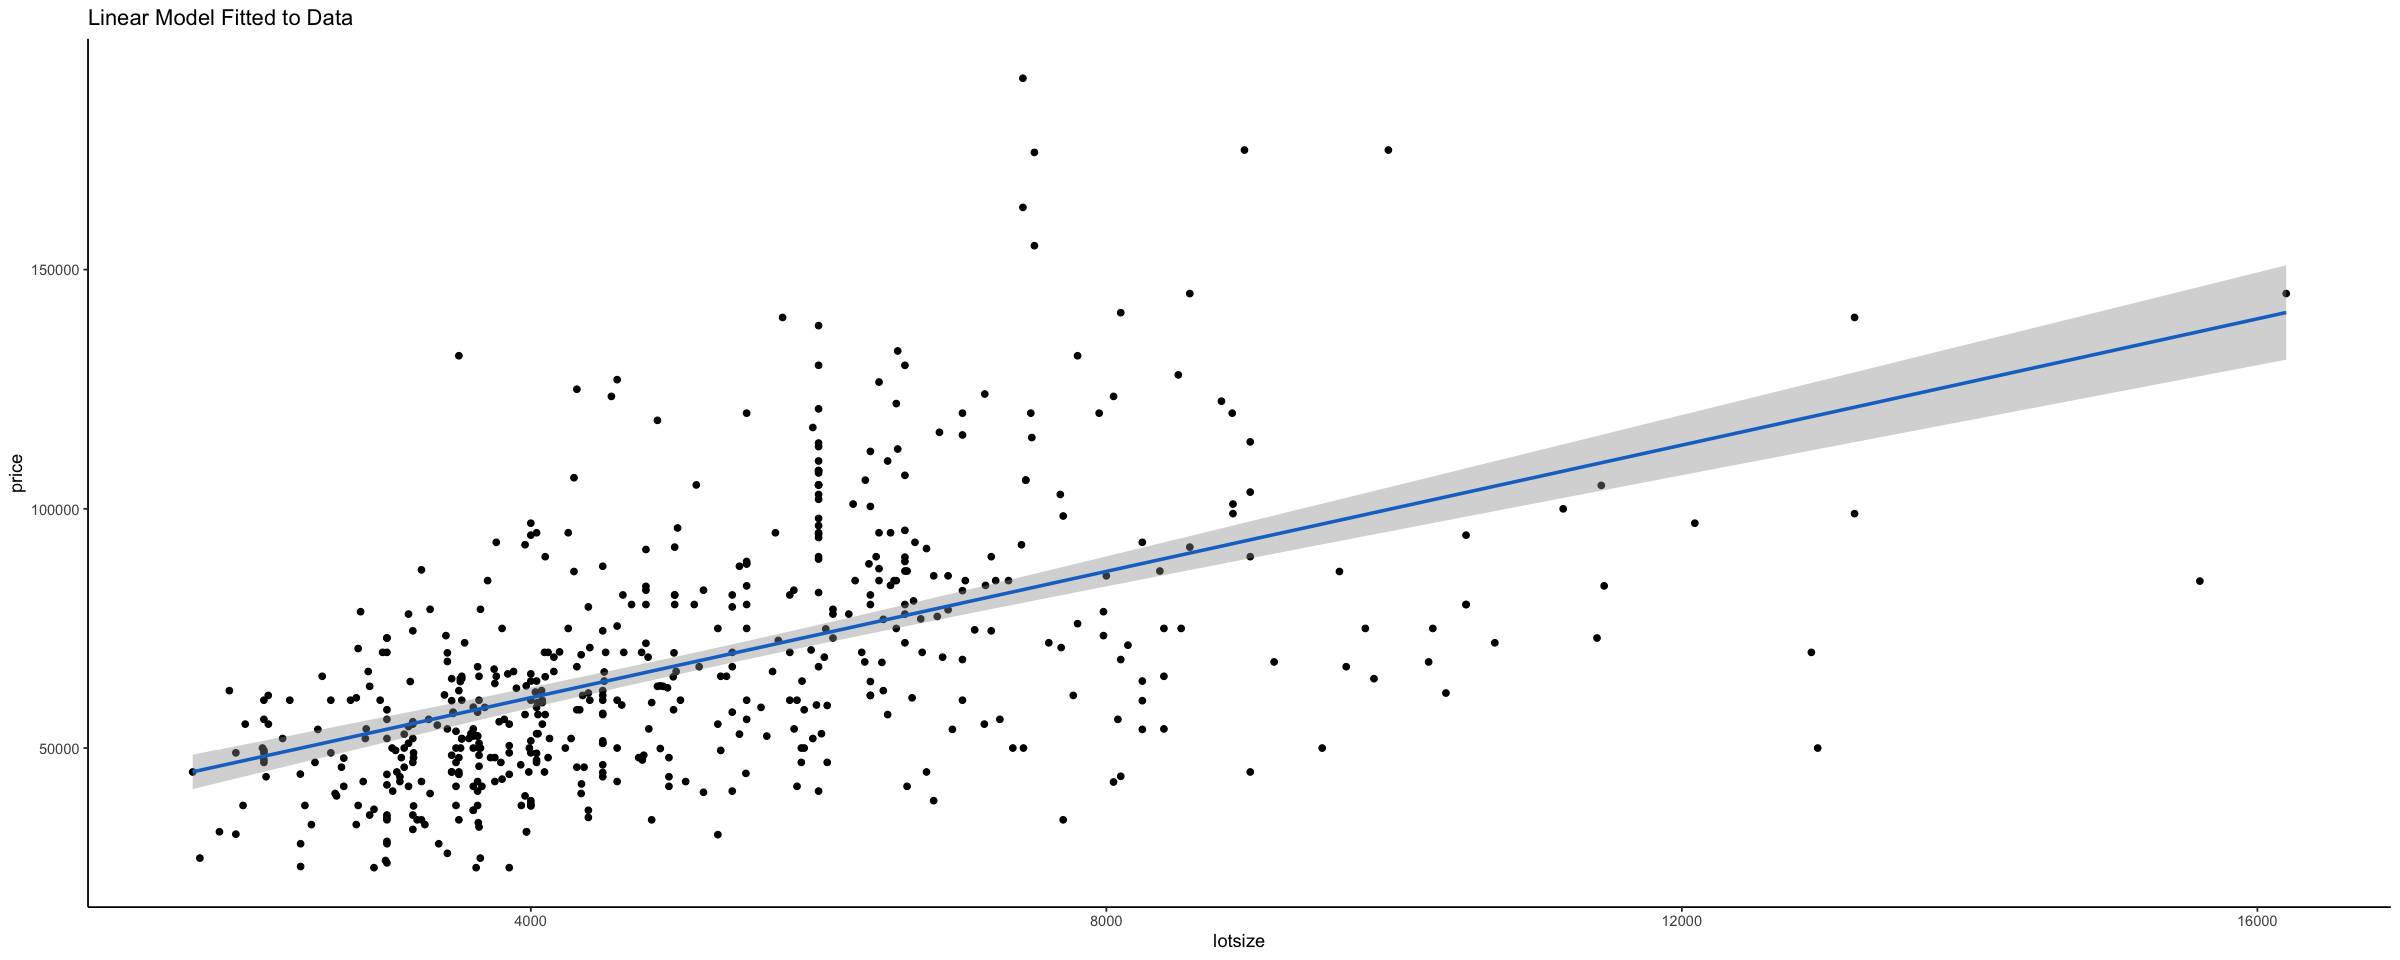

In [27]:
options(repr.plot.width = 20, repr.plot.height = 8)
ggplot(data = housing, aes(x = lotsize, y = price)) +
  geom_point() +
  stat_smooth(method = "lm", col = "dodgerblue3") +
  theme(panel.background = element_rect(fill = "white"),
        axis.line.x=element_line(),
        axis.line.y=element_line()) +
  ggtitle("Linear Model Fitted to Data")

## Part3. Random Forest

In this step, I build the random forest model to see if I can get the better performance.

### Set train/test data

In [28]:
set.seed(100)
train <- sample(nrow(housing), 0.7*nrow(housing), replace = FALSE)
TrainSet <- housing[train,]
ValidSet <- housing[-train,]
summary(TrainSet)
summary(ValidSet)

     price           lotsize         bedrooms        bathrms     
 Min.   : 25000   Min.   : 1700   Min.   :1.000   Min.   :1.000  
 1st Qu.: 50000   1st Qu.: 3600   1st Qu.:3.000   1st Qu.:1.000  
 Median : 65000   Median : 4643   Median :3.000   Median :1.000  
 Mean   : 70164   Mean   : 5243   Mean   :2.969   Mean   :1.309  
 3rd Qu.: 84675   3rd Qu.: 6415   3rd Qu.:3.000   3rd Qu.:2.000  
 Max.   :175000   Max.   :16200   Max.   :5.000   Max.   :4.000  
    stories         driveway         recroom          fullbase     
 Min.   :1.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :2.000   Median :1.0000   Median :0.0000   Median :0.0000  
 Mean   :1.798   Mean   :0.8717   Mean   :0.1832   Mean   :0.3665  
 3rd Qu.:2.000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :4.000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
     gashw             airco           garagepl        prefare

     price           lotsize         bedrooms        bathrms     
 Min.   : 25245   Min.   : 1650   Min.   :2.000   Min.   :1.000  
 1st Qu.: 48375   1st Qu.: 3558   1st Qu.:2.000   1st Qu.:1.000  
 Median : 57500   Median : 4500   Median :3.000   Median :1.000  
 Mean   : 63363   Mean   : 4935   Mean   :2.957   Mean   :1.232  
 3rd Qu.: 77175   3rd Qu.: 6360   3rd Qu.:3.000   3rd Qu.:1.000  
 Max.   :190000   Max.   :11410   Max.   :6.000   Max.   :3.000  
    stories         driveway         recroom          fullbase    
 Min.   :1.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:1.000   1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :2.000   Median :1.0000   Median :0.0000   Median :0.000  
 Mean   :1.829   Mean   :0.8293   Mean   :0.1646   Mean   :0.311  
 3rd Qu.:2.000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.000  
 Max.   :4.000   Max.   :1.0000   Max.   :1.0000   Max.   :1.000  
     gashw             airco          garagepl         prefarea     


### Build the model

In [29]:
rf_model <- randomForest(price ~ ., data = TrainSet, ntree = 500, mtry = 4, importance = TRUE)
rf_model


Call:
 randomForest(formula = price ~ ., data = TrainSet, ntree = 500,      mtry = 4, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 290385188
                    % Var explained: 61.38

### Find out feature importance

As we can see from the graph, lotsize, bathrooms, stories, airco, bedrooms stand for the top 5 features importance.

[1] "Plot of variable importance"
[1] "Variable importance of initial model"


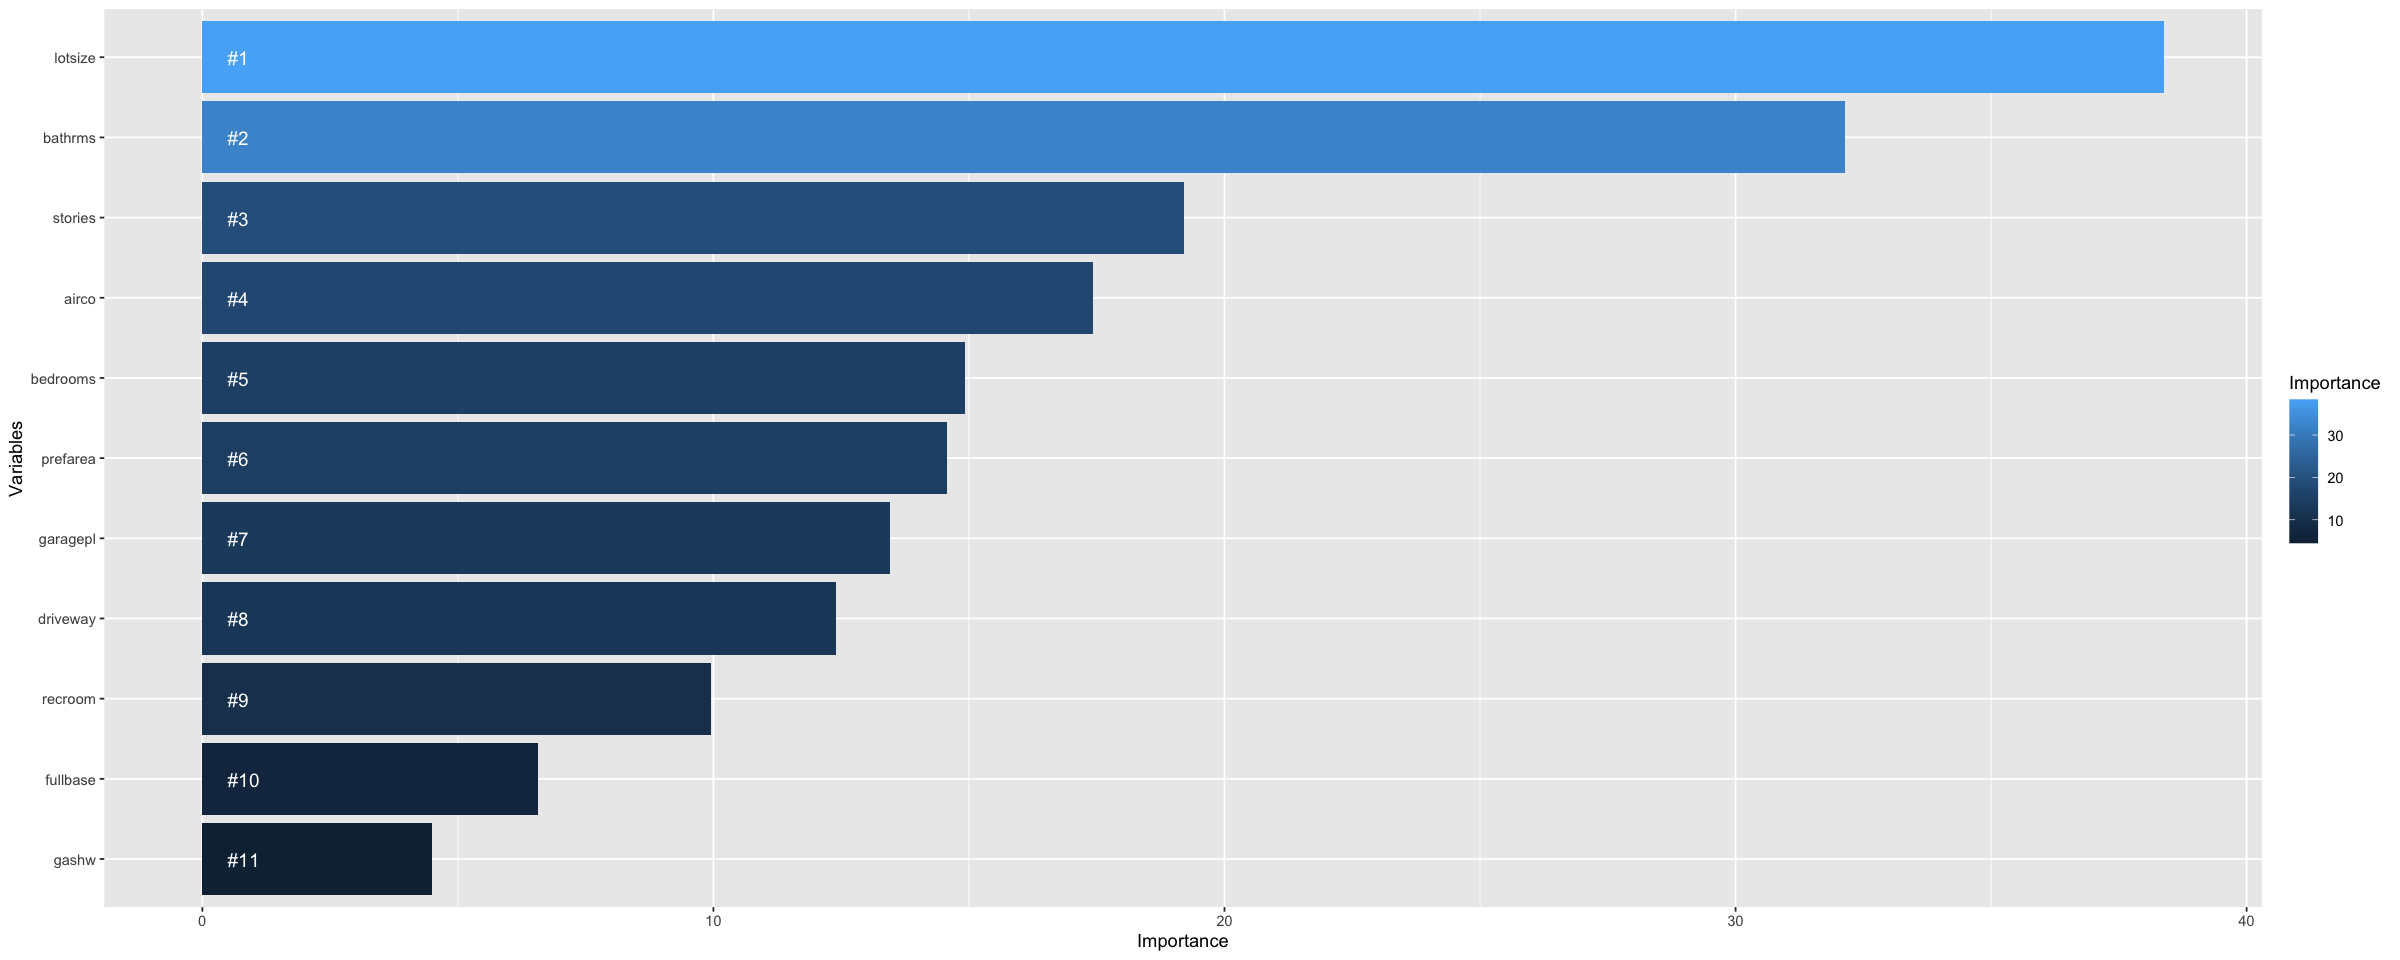

In [30]:
importance    <- importance(rf_model)
varImportance <- data.frame(Variables = row.names(importance), 
                            Importance = round(importance[ ,'%IncMSE'],2))
rankImportance <- varImportance %>% mutate(Rank = paste0('#',dense_rank(desc(Importance))))
print("Plot of variable importance")
print("Variable importance of initial model")
options(repr.plot.width = 20, repr.plot.height = 8)
ggplot(rankImportance, aes(x = reorder(Variables, Importance), 
                           y = Importance, fill = Importance)) +
  geom_bar(stat='identity') + 
  geom_text(aes(x = Variables, y = 0.5, label = Rank),
            hjust=0, vjust=0.55, size = 4, colour = 'white') +
  labs(x = 'Variables') +
  coord_flip()

### Predict the value

I set up bedrooms = 4, bathrooms = 2, storied houses = 2 with approx lot size of 5500 SFT. I also assumed that there are driveway, recroom, fullbase, gashw, airco, garagepl, prefarea in the house.

In [31]:
predict(rf_model, data.frame(bedrooms = 4, bathrms = 2, stories = 2, lotsize = 5500, 
                             driveway = 1, recroom = 1, fullbase = 1, gashw = 1, airco = 1, garagepl = 1, 
                             prefarea = 1))

1 
114181.1

I set up bedrooms = 4, bathrooms = 2, storied houses = 2 with approx lot size of 5500 SFT. I also assumed that there is no driveway, recroom, fullbase, gashw, airco, garagepl, prefarea in the house.

In [32]:
predict(rf_model, data.frame(bedrooms = 4, bathrms = 2, stories = 2, lotsize = 5500, 
                             driveway = 0, recroom = 0, fullbase = 0, gashw = 0, airco = 0, garagepl = 0, 
                             prefarea = 0))

1 
72657.91

### Performance of the model and outcome

- After running the model, the % Var explained is 61.38
- The performance of linear regression model is better than random forest. Therefore, I would choose using linear regression to predict the housing price.
- From feature importance, we can find that lotsize, bathrooms, stories, airco, bedrooms stand for the top 5 feature importance.

## Part4. Conclusion

In this project, I would choose linear regression model to conduct the prediction of housing price. 

First, I explored and visualizaed the data to see the pattern and correlation.

Then, I set up dependent and independent variables to run the model.

I got the result that when bedrooms = 4, bathrooms = 2, storied houses = 2 with approx lot size of 5500 SFT. And there are driveway, recroom, fullbase, gashw, airco, garagepl, prefarea in the house, the housing price would be 121761.987274765.

When bedrooms = 4, bathrooms = 2, storied houses = 2 with approx lot size of 5500 SFT. And there is no driveway, recroom, fullbase, gashw, airco, garagepl, prefarea in the house, I got the result of housing price to be 66307.3859497059.

From the residual plot, we can find that the distribution of the residuals plot are discrete and close to the line. It means that the model performs good and there is no significant deviation.

By linear regression model, we can make predictions about one variable based on particular values of the other variable. The usage of linear regression model is comprehensive, we can use it in many different industry to predict the future for us and create a better business value!


- What makes the problem interesting from the viewpoint of analytics?

    It's interesting to find that the housing price will be influence by so many factors and by setting up the model, we can predict the housing price from historical data.
    

- How did the chosen technique help to illuminate the, or solve the problem?

    The linear regression helps to predict the outcome from independent variables.
    

- What analysis do you think should be conducted next?

    The next analysis should be investment analysis. By a deeper analysis, buyers can decide whether the house is worthful for investment. The market trend, the location, the development strategy can all be the factors. We can use logistic regression or random forest method to conduct the further analysis. If the result show 'yes', then we should buy the house!